In [5]:
'''
 Load data. Input files defined in yaml files (destest_bpz.yaml, destest_metacal.yaml,destest_gold.yaml)
 It requires destest : 
 https://github.com/des-science/destest
 
 catalogs (to be specified in the yaml files):
 
 Latest version '/g
 lobal/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18.h5'
 Latest subsampled version (for quick tests): '/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18_subsampled.h5'
 
 I didn't manage to run the destest Calibrator. This means that if you directly load R1 and R2 from the catalog,
 they are only the respones of the sample and neglect the response of the selection (which is usually few %).
 The solution I got was to load the columns without selection (uncut=True)
 and apply the response and selection by myself.
'''



import pyfits as pf
import healpy as hp
import numpy as np

def IndexToDeclRa(index, nside,ge=False,nest=False):
    theta,phi=hp.pixelfunc.pix2ang(nside ,index,nest)
    if ge:
        r = hp.rotator.Rotator(coord=['G','E'])
        theta, phi = r(theta,phi) 
    return -np.degrees(theta-np.pi/2.),np.degrees(phi)



from astropy.coordinates import SkyCoord
from astropy import units as u
def data_coord_cov(ra_in,dec_in, icrs2gal=False, gal2icrs=False):
    if icrs2gal:
        c_icrs = SkyCoord(ra=ra_in * u.degree, dec=dec_in * u.degree, frame='icrs')
        c_gal = c_icrs.galactic
        l_out, b_out = (c_gal.l).value, (c_gal.b).value
        return l_out, b_out
    if gal2icrs:
        c_gal = SkyCoord(l=ra_in * u.degree, b=dec_in * u.degree, frame='galactic')
        c_icrs = c_gal.icrs
        ra_out, dec_out = (c_icrs.ra).value, (c_icrs.dec).value
        return ra_out, dec_out
    
    
def to_ra_dec(theta,phi):
    ra = phi*180./np.pi
    dec = 90. - theta*180./np.pi
    return ra, dec

def IndexToDeclRa(index, nside,ge=False,nest=False):
    theta,phi=hp.pixelfunc.pix2ang(nside ,index,nest)
    if ge:
        r = hp.rotator.Rotator(coord=['G','E'])
        theta, phi = r(theta,phi) 
    return -np.degrees(theta-np.pi/2.),np.degrees(phi)



    ipix = np.arange(0,npix)
    theta, phi = hp.pixelfunc.pix2ang(nside, ipix)
    ra, dec = to_ra_dec(theta,phi)
    kappa = map
    return ra,dec,kappa

import sys
#sys.path.insert(0, '/global/homes/m/mgatti/Mass_Mapping/systematic_checks/')
from routines import *
import numpy as np

# ******************************************************************
#                              INPUT
# ******************************************************************
nside_mask = 1024  
nside_fast_corr = 1024
nside_cmb = 2048

# output folders ***************
fold1= '/global/cscratch1/sd/mgatti/Cosmic_shear/output_tsz/'  
name_folder_x = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_tsz/rerun_mastercat_4_20_newACT/'

if not os.path.exists(fold1):
    os.mkdir(fold1)
if not os.path.exists(name_folder_x):
    os.mkdir(name_folder_x)

print ("done")



bins = ['0.43_0.63','0.63_0.9','0.9_1.3','0.2_1.3']
nside = 1024
bins_min = [0.2,0.43,0.63,0.9]
bins_max = [0.43,0.63,0.9,1.3]




import sys, os
sys.path.insert(0,  '/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis//ACTxDESY3/src/cosmosis_code')
os.environ['COSMOSIS_SRC_DIR'] = '/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis/'
 
import numpy as np
import copy
import pdb
import ast
import scipy as sp
from scipy import interpolate
'''
from HOD import *
from pressure import *
from general_hm import *
from Powerspec import *
from PrepDataVec import *
from DataVec import *
import pickle
'''

done


'\nfrom HOD import *\nfrom pressure import *\nfrom general_hm import *\nfrom Powerspec import *\nfrom PrepDataVec import *\nfrom DataVec import *\nimport pickle\n'

# Load tsz maps

/global/homes/m/mgatti/.conda/envs/myenv/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


('frac : ', 0.0095573868538333853)


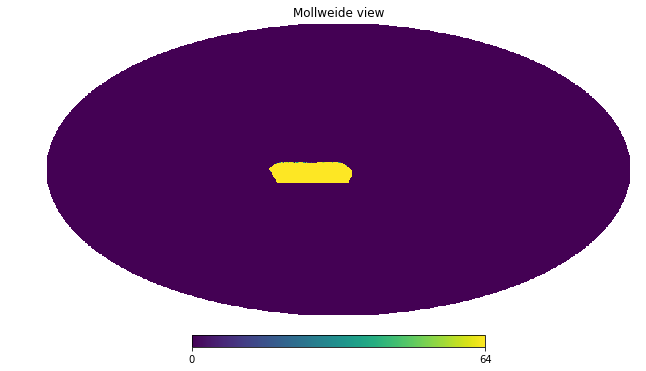

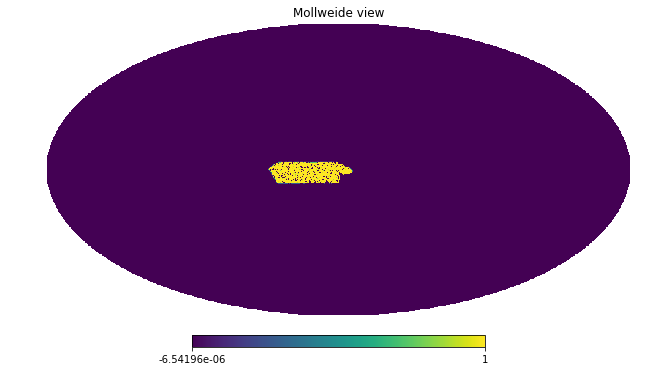

In [2]:
#****** load ACT MAPS ******************************************
#load ACT at nside =8192 ***********

import h5py
import healpy as hp
path_ACT = '/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_map_v1.0.0_rc_joint_healpix_8192.fits'
path_ACT_cib ='/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_deprojects_cib_map_v1.0.0_rc_joint_healpix_8192.fits'
path_ACT_cmb ='/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_deprojects_cmb_map_v1.0.0_rc_joint_healpix_8192.fits'
mask_act = '/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_mask_healpix_8192.fits'

mute_mask = pf.open(mask_act)
mask_ACT = mute_mask[1].data['T'].reshape(786432*1024)


mute = pf.open(path_ACT)
ACT_map = mute[1].data['T'].reshape(786432*1024)[mask_ACT>0.8]
mute_cib = pf.open(path_ACT_cib)
ACT_map_cib = mute_cib[1].data['T'].reshape(786432*1024)[mask_ACT>0.8]
mute_cmb = pf.open(path_ACT_cmb)
ACT_map_cmb = mute_cmb[1].data['T'].reshape(786432*1024)[mask_ACT>0.8]

# selecting the mask with >0.8 occupancy
dec4,ra4 = IndexToDeclRa(np.arange(len(mask_ACT)), 4096*2)
dec_ACT=dec4[mask_ACT>0.8]
ra_ACT=ra4[mask_ACT>0.8]


# the following bits create ACT mask needed for JK *****
pix_compton_ACT = convert_to_pix_coord(ra_ACT, dec_ACT, nside=nside_fast_corr)
ny_map_sp1_ACT = np.zeros(hp.nside2npix(nside_fast_corr))
y_map_sp1_ACT = np.zeros(hp.nside2npix(nside_fast_corr))
unique_pix1, idx1, idx_rep1 = np.unique(pix_compton_ACT, return_index=True, return_inverse=True)
ny_map_sp1_ACT[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_compton_ACT)))
y_map_sp1_ACT[unique_pix1] += np.bincount(idx_rep1, weights=(ACT_map))
mas_ACT = ny_map_sp1_ACT!=0.
y_map_sp1_ACT[mas_ACT] =  y_map_sp1_ACT[mas_ACT] /ny_map_sp1_ACT[mas_ACT] 
hp.mollview(ny_map_sp1_ACT)
ny_map_sp1_ACT[ny_map_sp1_ACT!=0]=1

# this load the mastercat mask..to compute f_sky for ACT x DES. I am also re-loading ACT at nside =4096
f = h5py.File('/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_03_31_20.h5','r')
frc = np.array(f['index/mask/fracgood'])
hpi = np.array(f['index/mask/hpix'])

area = 0.*np.array(range(hp.nside2npix(4096)))
area[hp.pixelfunc.nest2ring(4096,hpi)]=frc


mask_act = '/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_mask_healpix.fits'
mute_mask = pf.open(mask_act)

ny_map_sp1_ACT = mute_mask[1].data['T'].reshape(196608*1024)
ny_map_sp1_ACT[ny_map_sp1_ACT>0.8]=1.
hp.mollview(ny_map_sp1_ACT*area)
print ('frac : ',np.sum(ny_map_sp1_ACT*area)*1./len(ny_map_sp1_ACT))
mas_ACT = ny_map_sp1_ACT!=0.


pix_compton_ACT = convert_to_pix_coord(ra_ACT, dec_ACT, nside=nside_fast_corr)
ny_map_sp1_ACT = np.zeros(hp.nside2npix(nside_fast_corr))
y_map_sp1_ACT = np.zeros(hp.nside2npix(nside_fast_corr))
unique_pix1, idx1, idx_rep1 = np.unique(pix_compton_ACT, return_index=True, return_inverse=True)
ny_map_sp1_ACT[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_compton_ACT)))
y_map_sp1_ACT[unique_pix1] += np.bincount(idx_rep1, weights=(ACT_map))

#('frac : ', 0.0095573868538333853) act x des
#('frac : ', 0.083858768145243331) des x planck
#len(f['index/mask/hpix'])*1./len(np.array(range(hp.nside2npix(4096))))#
# des fraction: 0.10141000151634216 len(f['index/mask/hpix'])*1./len(np.array(range(hp.nside2npix(4096))))

In [101]:
def ind2eq(index):
    theta,phi=hp.pixelfunc.pix2ang(2048,index)
    ra = phi*180./np.pi
    dec = 90. - theta*180./np.pi
    return ra, dec

# load planck maps ************************************************************
path = '/global/cscratch1/sd/mgatti/Mass_Mapping/tsz/'
file = 'COM_CompMap_Compton-SZMap-milca-ymaps_2048_R2.00.fits'


# mask is: nest **
mask_com = pf.open(path+"/COM_CompMap_Compton-SZMap-masks_2048_R2.01.fits")
npix = len(mask_com[1].data['M1'])
ipix = np.arange(0,npix)
ipix = hp.pixelfunc.ring2nest(2048, ipix)
hh = mask_com[1].data['M1'][ipix]

#conversion to normal ra,dec
indall = np.arange(0,npix)[hh>0.1]  # CUTS OUT OBJ WITH 10% CONTAMINATION!!!
yLall, yBall = ind2eq(indall)
rayall, decyall  = data_coord_cov(yLall, yBall, gal2icrs=True)

# further masking the maps to avoid overlap with ACT
mute = pf.open(path+file)
ymap = (mute[1].data['FULL'])[hh>0.1]
rayall=rayall[decyall<-10.]
ymap=ymap[decyall<-10.]
decyall=decyall[decyall<-10.]


# create the mask needed for JK and compute f_sky*****
ny_map_sp_planck = np.zeros(hp.nside2npix(2048))

pix_compton = convert_to_pix_coord(rayall, decyall, nside=2048)

unique_pix1, idx1, idx_rep1 = np.unique(pix_compton, return_index=True, return_inverse=True)
ny_map_sp_planck[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_compton)))

ny_map_sp_planck[ny_map_sp_planck!=0]=1.


# downgrade des area to nside=2048********
area_2048=hp.pixelfunc.ud_grade(area,2048)
hp.mollview(area_2048*ny_map_sp_planck)
du = (area_2048*ny_map_sp_planck)
du[du!=0]=1
print ('frac : ',np.sum(du)*1./len(area_2048))


ny_map_sp1 = np.zeros(hp.nside2npix(nside_fast_corr))
y_map_sp1 = np.zeros(hp.nside2npix(nside_fast_corr))

pix_compton = convert_to_pix_coord(rayall, decyall, nside=nside_fast_corr)

unique_pix1, idx1, idx_rep1 = np.unique(pix_compton, return_index=True, return_inverse=True)
ny_map_sp1[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_compton)))
y_map_sp1[unique_pix1] += np.bincount(idx_rep1, weights=ymap)
  
mas = ny_map_sp1!=0.
y_map_sp1[mas] = y_map_sp1[mas]/ny_map_sp1[mas]

import healpy as hp
hp.mollview(mas)


NameError: name 'area_2048' is not defined

# load mastercat

/global/homes/m/mgatti/.conda/envs/myenv/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


[u'T', u'T_err', u'covmat_0_1', u'covmat_1_1', u'covmat_2_2', u'e_1', u'e_2', u'flux_err_i', u'flux_err_r', u'flux_err_z', u'flux_i', u'flux_r', u'flux_z', u'size_ratio', u'snr', u'weight']
using select_path for mask
destest /global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_03_31_20.h5 index/select 399263026 100208944
end mask [     7390      7391      7393 ..., 399243228 399243235 399243240] [ True  True  True ...,  True  True  True]
R11 not in sheared cols
R11 not in sheared cols
R11 not in sheared cols
R11 not in sheared cols
[u'bhat', u'cell_wide']
0
----- e_1 ['e_1', 'e_2']
Rs e_1 0.742062934778 0.00470996362373
5
----- e_1 ['e_1', 'e_2']
Rs e_1 0.742062934778 0.00470996362373
----- e_2 ['e_1', 'e_2']
Rs e_2 0.744113169821 0.00504706535979


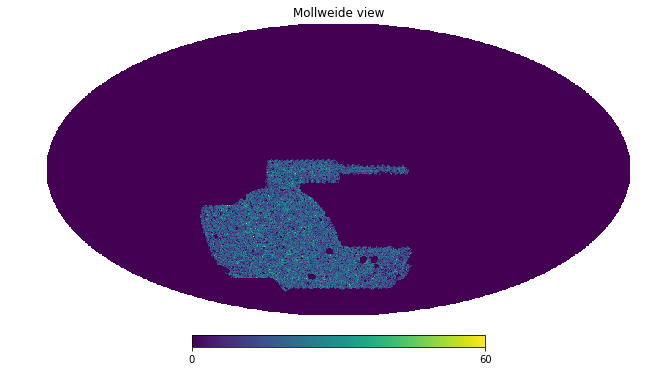

1
----- e_1 ['e_1', 'e_2']
Rs e_1 0.69902026656 0.00837860201219
5
----- e_1 ['e_1', 'e_2']
Rs e_1 0.69902026656 0.00837860201219
----- e_2 ['e_1', 'e_2']
Rs e_2 0.699721192438 0.00897593780334


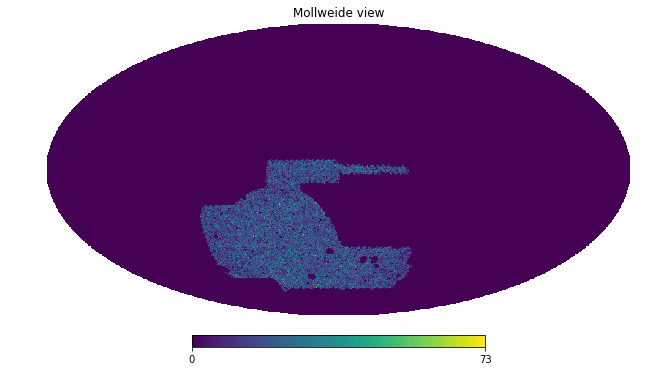

2
----- e_1 ['e_1', 'e_2']
Rs e_1 0.667166349722 0.0124863007421
5
----- e_1 ['e_1', 'e_2']
Rs e_1 0.667166349722 0.0124863007421
----- e_2 ['e_1', 'e_2']
Rs e_2 0.667739103029 0.0134944034316


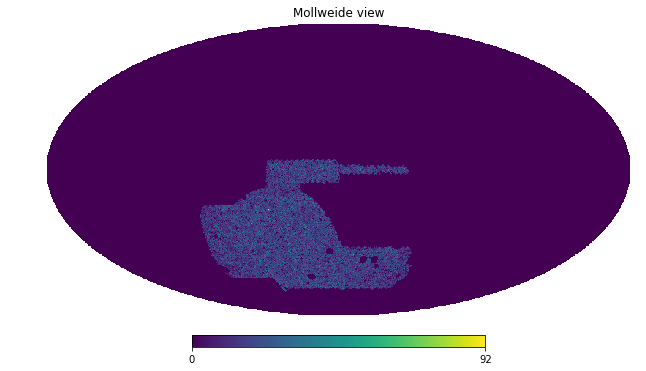

3
----- e_1 ['e_1', 'e_2']
Rs e_1 0.586029616667 0.0147978063458
5
----- e_1 ['e_1', 'e_2']
Rs e_1 0.586029616667 0.0147978063458
----- e_2 ['e_1', 'e_2']
Rs e_2 0.58648054461 0.0148651697227


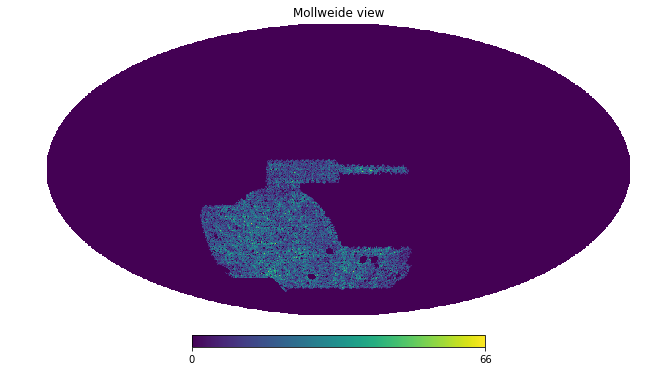

In [10]:
import numpy as np
import pyfits as pf
import healpy as hp
import h5py as h5
import os
import sys
import yaml
import destest
import treecorr
# this routine is used to generate random rotations of the shapes - useful to estimate shape noise!
def apply_random_rotation(e1_in, e2_in):
    np.random.seed() # CRITICAL in multiple processes !
    rot_angle = np.random.rand(len(e1_in))*2*np.pi #no need for 2?
    cos = np.cos(rot_angle)
    sin = np.sin(rot_angle)
    e1_out = + e1_in * cos + e2_in * sin
    e2_out = - e1_in * sin + e2_in * cos
    return e1_out, e2_out
# This routine converts healpy pixel index to dec ra coordinates.
def IndexToDeclRa(index, nside,nest= False):
    theta,phi=hp.pixelfunc.pix2ang(nside ,index,nest=nest)
    return -np.degrees(theta-np.pi/2.),np.degrees(phi)
# basic dict props - needed for destest
destest_dict_ = {
    'output_exists' : True,
    'use_mpi'       : False,
    'source'        : 'hdf5',
    'dg'            : 0.01
    }
# Populates a full destest yaml dict for each catalog selection based on the limited catalog input info provided in the common cats.yaml file
def create_destest_yaml( params, name, cal_type, group, table, select_path ):
    """
    Creates the input dictionary structure from a passed dictionary rather than reading froma yaml file.
    """
    destest_dict = destest_dict_.copy()
    destest_dict['load_cache'] = params['load_cache']
    destest_dict['output'] = params['output']
    destest_dict['name'] = name
    destest_dict['filename'] = params['datafile']
    destest_dict['param_file'] = params['param_file']
    destest_dict['cal_type'] = cal_type
    destest_dict['group'] = group
    destest_dict['table'] = table
    destest_dict['select_path'] = select_path
    destest_dict['e'] = ['e_1','e_2']
    destest_dict['Rg'] = ['R11','R22']
    destest_dict['w'] = 'weight'
    return destest_dict
# Build selector (and calibrator) classes from destest for the catalog.
def load_catalog(pipe_params, name, cal_type, group, table, select_path, inherit=None, return_calibrator=None):
    """
    Loads data access and calibration classes from destest for a given yaml setup file.
    """
    # Input yaml file defining catalog
    params = create_destest_yaml(pipe_params, name, cal_type, group, table, select_path)
    # Load destest source class to manage access to file
    source = destest.H5Source(params)
    # Load destest selector class to manage access to data in a structured way
    if inherit is None:
        sel = destest.Selector(params,source)
    else:
        sel = destest.Selector(params,source,inherit=inherit)
    # Load destest calibrator class to manage calibration of the catalog
    if return_calibrator is not None:
        cal = return_calibrator(params,sel)
        return sel, cal
    else:
        return sel
    

# Beginning of the code! **********************************************************
# Read yaml file that defines all the catalog selections used
params = yaml.load(open('cats.yaml'))
params['param_file'] = 'cats.yaml'
# Source catalog
source_selector, source_calibrator = load_catalog(
    params, 'mcal', 'mcal', params['source_group'], params['source_table'], params['source_path'], return_calibrator=destest.MetaCalib)
# Gold catalog
gold_selector = load_catalog(
    params, 'gold', 'mcal', params['gold_group'], params['gold_table'], params['gold_path'], inherit=source_selector)
# BPZ (or DNF) catalog, depending on paths in cats.yaml file (exchange bpz and dnf)
pz_selector = load_catalog(
    params, 'pz', 'mcal', params['pz_group'], params['pz_table'], params['pz_path'], inherit=source_selector)
# I create a dictionary where I'll store ra,dec,e1,e2 and the maps ****
cat = dict()
cat_planck = dict()
cat_ACT = dict()
# run over 4 tomographic bins
# Get some source photo-z binning information, cut to range 0.1<z_mean<1.3                                                  
for i in range(4):
    print (i)
    pzbin = pz_selector.get_col('bhat') # 5-tuple for metacal (un)sheared versions                                         
    mask = [pzbin[j] == i for j in range(5)] # First tomographic bin                                                               
    # Note that get_col() returns a tuple. If its a catalog like gold, it will have length 0, but for something like metacal, it will have length 5 (in the order of the table variable list passed in cats.yaml, i.e., 'unsheared', 'sheared_1p', 'sheared_1m', 'sheared_2p', 'sheared_2m')                                                               
    # Note that get_col() applies the index mask specified by the 'path' variable in the cats.yaml file automatically.         # Get responses (c, which doesn't exist for our catalogs), and weights                                                      
    R1,c,w = source_calibrator.calibrate('e_1', mask=mask,return_full_w=True) # Optionally pass an additional mask to use when calculating the selection response. The returned R1 is <Rg_1 + Rs_1>. To get an array of R's, use return_wRg=True to get [Rg_1+Rg_2]/2 for each object or return_wRgS=True to include the selection response. return_full=True returns the non-component-averaged version of the full response.
    print len(w)
    #R2,c,w = source_calibrator.calibrate('e_2', mask=mask)
    #print(R2,c,w)
    g1 = source_selector.get_col('e_1')[0][mask[0]]
    g2 = source_selector.get_col('e_2')[0][mask[0]]
    ra = gold_selector.get_col('ra')[0][mask[0]]
    dec = gold_selector.get_col('dec')[0][mask[0]]
    wa = source_calibrator.calibrate('e_1', mask=mask,weight_only=True) # Optionally pass an additional mask to use when calculating the selection response. The returned R1 is <Rg_1 + Rs_1>. To get an array of R's, use return_wRg=True to get [Rg_1+Rg_2]/2 for each object or return_wRgS=True to include the selection response. return_full=True returns the non-component-averaged version of the full response.
    #g2=source_selector.get_col('e_2')[0]
    R1,c,w = source_calibrator.calibrate('e_1',mask=mask) # Optionally pass an additional mask to use when calculating the selection response. The returned R1 is <Rg_1 + Rs_1>. To get an array of R's, use return_wRg=True to get [Rg_1+Rg_2]/2 for each object or return_wRgS=True to include the selection response. return_full=True returns the non-component-averaged version of the full response.
    R2,c,w = source_calibrator.calibrate('e_2',mask=mask)
    # these are the g1,g2 components for the i-th tomographic bin. I already subtracted the mean.
    # remeber each galaxy comes with a weight 'w'
    g1 =(g1 - np.mean(g1*wa)/np.mean(wa))/R1
    g2 =(g2 - np.mean(g2*wa)/np.mean(wa))/R2
    g1r,g2r= apply_random_rotation(g1,g2)
    # here I am storing g1,g2,e1,e2,w, and the maps
    cat[i] = [g1,g2, ra,dec, 1, w]
    
    pix1 = convert_to_pix_coord(ra,dec, nside=nside_fast_corr)
    ind = np.in1d(pix1,pix_compton)
    cat_planck[i] = [g1[ind],g2[ind], ra[ind],dec[ind], 1, w[ind]]
    
    
    
    pix1 = convert_to_pix_coord(ra,dec, nside=nside_fast_corr)
    ind = np.in1d(pix1,pix_compton_ACT)
    cat_ACT[i] = [g1[ind],g2[ind], ra[ind],dec[ind], 1, w[ind]]
    
    pix1 = convert_to_pix_coord(ra,dec, nside=nside_fast_corr)
    ind = np.in1d(pix1,pix_compton)

    desy3_map_tomo = np.zeros(hp.nside2npix(nside_fast_corr))
    unique_pix1, idx1, idx_rep1 = np.unique(pix1, return_index=True, return_inverse=True)
    desy3_map_tomo[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix1)))
    hp.mollview(desy3_map_tomo)
    mas_desy3 = desy3_map_tomo!=0.
    plt.show()
'''
import copy
cat = dict()
cat_ACT = dict()
catt_w = load_obj('/global/cscratch1/sd/mgatti/Mass_Mapping/Maps_Y3/catt_w')
for i in range(1):
    g1 = -copy.copy(catt_w[i][0])
    g2 = copy.copy(catt_w[i][1])
    ra = copy.copy(catt_w[i][2])
    dec = copy.copy(catt_w[i][3])
    w = np.ones(len(g1))
    cat[i] = [g1,g2, ra,dec, 1, w]
    
    pix1 = convert_to_pix_coord(ra,dec, nside=nside_fast_corr)
    ind = np.in1d(pix1,pix_compton_ACT)
    
    
    cat_ACT[i] = [g1[ind],g2[ind], ra[ind],dec[ind], 1, w[ind]]
    
    pix1 = convert_to_pix_coord(ra,dec, nside=nside_fast_corr)
    ind = np.in1d(pix1,pix_compton)

    desy3_map_tomo = np.zeros(hp.nside2npix(nside_fast_corr))
    unique_pix1, idx1, idx_rep1 = np.unique(pix1[ind], return_index=True, return_inverse=True)
    desy3_map_tomo[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix1[ind])))
    hp.mollview(desy3_map_tomo)
    mas_desy3 = desy3_map_tomo!=0.
    plt.show()
    
hp.mollview(mas_desy3+mas)

'''
# application of y3 map to tsz map
ind = np.in1d(pix_compton,pix1)
ymap = ymap[ind]
rayall = rayall[ind]
decyall = decyall[ind]


# application of y3 map to tsz map
ind = np.in1d(pix_compton_ACT,pix1)
ACT_map = ACT_map[ind]
ACT_map_cib = ACT_map_cib[ind]
ACT_map_cmb = ACT_map_cmb[ind]

dec_ACT = dec_ACT[ind]
ra_ACT = ra_ACT[ind]


# load simulated data

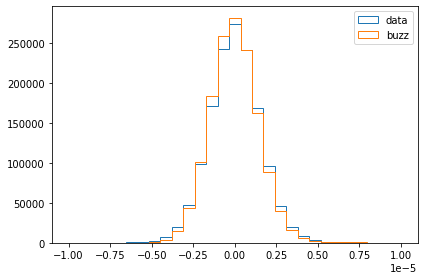

In [125]:
import pyfits as pf
from scipy.interpolate import interp1d
from scipy import arange, array, exp

def extrap1d(interpolator):
    xs = interpolator.x
    ys = interpolator.y

    def pointwise(x):
        if x < xs[0]:
            return ys[0]+(x-xs[0])*(ys[1]-ys[0])/(xs[1]-xs[0])
        elif x > xs[-1]:
            return ys[-1]+(x-xs[-1])*(ys[-1]-ys[-2])/(xs[-1]-xs[-2])
        else:
            return interpolator(x)

    def ufunclike(xs):
        return array(list(map(pointwise, array(xs))))

    return ufunclike



y_map_buzzardu = '/global/cscratch1/sd/mgatti/Mass_Mapping/tsz/ymap_Chinchilla-3_rot_desy3_irot.pkl_NM300_Nz100_all.fits'
y_map_buzzardu = pf.open(y_map_buzzardu)
y_map_buzzard =y_map_buzzardu[1].data['I'].reshape(49152* 1024)

dec_ybuz,ra_ybuz = IndexToDeclRa(np.arange(len(y_map_buzzard)), 2048)
dec_ybuz=dec_ybuz[y_map_buzzard>0.]
ra_ybuz=ra_ybuz[y_map_buzzard>0.]
mask_buzz = y_map_buzzardu[1].data['I'].reshape(49152* 1024)==0
y_map_buzzard=y_map_buzzard[y_map_buzzard>0.]



# creat Planck maps + noise:
noise_planck = np.loadtxt('/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis/ACTxDESY3/src/data/Planck/planck_yy_noise_full_full_beamed.txt')
f_i = interp1d(noise_planck[:,0], noise_planck[:,1])
f_planck = extrap1d(f_i)
map_noise_planck = hp.sphtfunc.synfast(f_planck(np.arange(4096)),nside=2048)
smothed_planck = hp.sphtfunc.smoothing(y_map_buzzardu[1].data['I'].reshape(49152* 1024),fm)
plank_final_buzzard = copy.copy(smothed_planck)+copy.copy(map_noise_planck)



_=plt.hist(ymap-np.mean(ymap),bins = np.linspace(-0.00001,0.00001,30),density=True,label='data', histtype='step')
_=plt.hist((plank_final_buzzard[~mask_buzz]-np.mean(plank_final_buzzard[~mask_buzz])),bins = np.linspace(-0.00001,0.00001,30),density=True, histtype='step',label='buzz')
plt.legend()
plt.show()


# create act map + noise:

path_ACT = '/global/cfs/cdirs/des/shivamp/ACTxDESY3_data/act_ymap_releases/v1.0.0/tilec_single_tile_deep56_comptony_map_v1.0.0_rc_joint_healpix_8192.fits'
mute = pf.open(path_ACT)
ACT_mapd = mute[1].data['T'].reshape(786432*1024)
ACT_map_2048=hp.pixelfunc.ud_grade(ACT_mapd,2048)


area_ACT_2048=hp.pixelfunc.ud_grade(mask_ACT,2048)
noise_act = np.loadtxt('/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis/ACTxDESY3/src/data/ACT/act_yy_noise_full_full_beamed.txt')
f_i = interp1d(noise_act[:,0], noise_act[:,1])
f_act = extrap1d(f_i)


map_noise_act = hp.sphtfunc.synfast(f_act(np.arange(4096)),nside=2048)
fm=1.6/(60./((2*math.pi)/360))
smothed_ACT =hp.sphtfunc.smoothing(y_map_buzzardu[1].data['I'].reshape(49152* 1024),fm)

act_final_buzzard = copy.copy(smothed_ACT)+copy.copy(map_noise_act)
act_final_buzzard[area_ACT_2048<0.8]=0.

#hp.mollview(smothed_planck)
_=plt.hist((ACT_map_2048[area_ACT_2048>0.8]-np.mean(ACT_map_2048[area_ACT_2048>0.8])),bins = np.linspace(-0.00001,0.00001,30),density=True, histtype='step',label='data')
_=plt.hist((act_final_buzzard[area_ACT_2048>0.8]-np.mean(act_final_buzzard[area_ACT_2048>0.8])),bins = np.linspace(-0.00001,0.00001,30),density=True, histtype='step',label='buzz')
plt.legend()
plt.show()

In [205]:
import h5py as h5
binmin=0.2
binmax=1.3


nside = 1024
mean_n = True
paths_base = '/global/cscratch1/sd/jderose/BCC/Chinchilla/Herd/'

path_sims = ['Chinchilla-3/sampleselection/Y3a/Buzzard-3_v2.0_Y3a_mastercat.h5']#,
            #'Chinchilla-3/sampleselection/Y3b/Buzzard-3_v2.0_Y3b_mastercat.h5',
            # 'Chinchilla-3/sampleselection/Y3a/Buzzard-4_v2.0_Y3a_mastercat.h5',
            # 'Chinchilla-3/sampleselection/Y3b/Buzzard-4_v2.0_Y3b_mastercat.h5',
#]

results = dict()

v =0
for path in path_sims:
    
    results[v] = dict()
    #mute=pf.open(path)
    mute = h5.File(paths_base+path,'r')
    select = np.array(mute['index']['select'])
    buz_ra = np.array(mute['catalog']['gold']['ra'])[select]
    buz_dec = np.array(mute['catalog']['gold']['dec'])[select]
    #buz_e1 = np.array(mute['catalog']['metacal'][u'unsheared']['e1'])[select]
    #buz_e2 = np.array(mute['catalog']['metacal'][u'unsheared']['e2'])[select]
    buz_g1 = np.array(mute['catalog']['metacal'][u'unsheared']['g1'])[select]
    buz_g2 = np.array(mute['catalog']['metacal'][u'unsheared']['g2'])[select]
    #buz_kappa = np.array(mute['catalog']['metacal'][u'unsheared']['kappa'])[select]
    buz_z=np.array(mute['catalog']['sompz'][u'unsheared']['z'])[select]
    bhat = np.array(mute['catalog']['sompz'][u'unsheared']['bhat'])[select]
    
#import treecorr
#downsample = np.where(np.arange(len(buz_ra)) % 10 == 0)[0]
#kcat1 = treecorr.Catalog(ra=buz_ra[downsample], dec=buz_dec[downsample], ra_units='degrees', dec_units='degrees', k =  buz_kappa[downsample])
#kcat = treecorr.Catalog(ra=ra_ybuz, dec=dec_ybuz, ra_units='degrees', dec_units='degrees', k =  y_map_buzzard)
#kk = treecorr.KKCorrelation(min_sep=2., max_sep=200., nbins=10, sep_units='arcmin',bin_slop=0.1)
#kk.process(kcat1, kcat)
#  
#    
#fig, ax = plt.subplots(1,1)
#ax.plot(kk.meanr, kk.xi)
    

In [ ]:
# correlation easy
Nbins = 20

min_theta = 2.5/60.
max_theta = 250./60.
number_of_cores = 64
bin_slope = 0.3


rewrite = False
runs_path = dict()
count = 0

conf = {'nbins': Nbins,
            'min_sep': min_theta,
            'max_sep': max_theta,
            'sep_units': 'degrees',
            'bin_slop': bin_slope,
            'nodes': number_of_cores  # parameter for treecorr
            }

cat_a = treecorr.Catalog(ra=buz_ra, dec=buz_dec, g1=buz_g1, g2=buz_g2,ra_units='deg', dec_units='deg')
cat_b = treecorr.Catalog(ra=ra_ybuz, dec=dec_ybuz, ra_units='deg', dec_units='deg',
                                     k=y_map_buzzard)
kk = treecorr.KGCorrelation(conf)
kk.process(cat_b, cat_a)


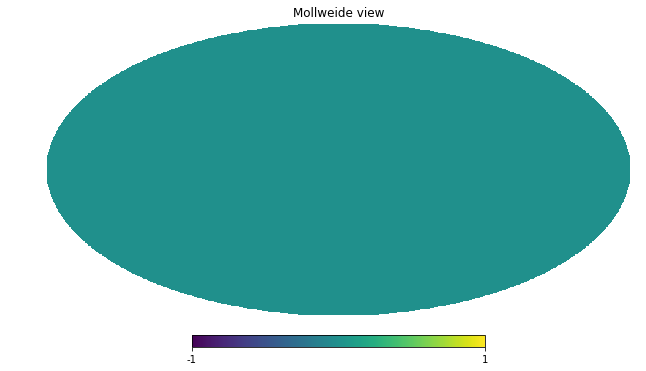

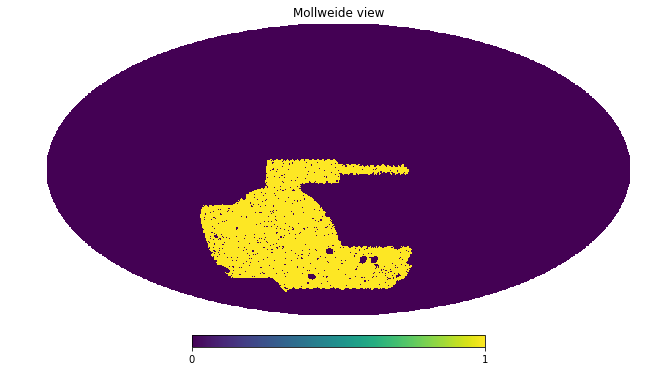

In [65]:
hp.mollview(ny_map_sp1_ACT)
plt.show()
hp.mollview(mas_desy3)
#(ny_map_sp1_ACT!=0.) & (mas_desy3!=0.)

# prep files ACT x DES data

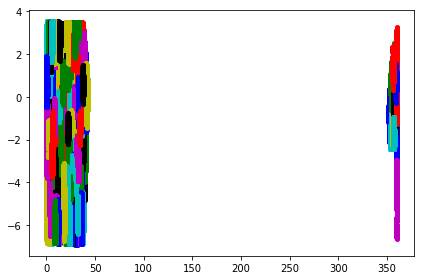

done


In [67]:
import kmeans_radec
import os
from scipy import spatial
from kmeans_radec import KMeans, kmeans_sample


# INPUT:   ****************************
'''
you might want to use 100 jackknife if you're using
the sumbsampled version of the catalog/
'''
n_jck = 200 #!!!!!!


def jaccknife_regions(ra,dec,number_of_regions,label_jck = None, centers_jck = None, v = False):
    new_cat=np.array(zip(ra, dec))
    A=new_cat[np.random.randint(new_cat.shape[0],size=20000),:]
    
    if not v:
        centers_jck= kmeans_radec.kmeans_sample(A,number_of_regions,maxiter=100,tol=1e-05,verbose=0)
        np.savetxt(label_jck, centers_jck.centers)
        centers_tree = spatial.cKDTree(centers_jck.centers[:,[0,1]])
        _ , hpix= centers_tree.query(np.array(zip(ra,dec)))
        return centers_tree, hpix, centers_jck.centers[:,[0,1]]   
    
    centers_tree = spatial.cKDTree(centers_jck[:,[0,1]])
    _ , hpix= centers_tree.query(np.array(zip(ra,dec)))
    return centers_tree, hpix, centers_jck[:,[0,1]]

# define jackknife regions **********************
mask_jkkk = (ny_map_sp1_ACT!=0.) & (mas_desy3!=0.)
area = np.array(range(hp.nside2npix(nside_fast_corr)))[mask_jkkk]
dech,rah = IndexToDeclRa(area, nside_fast_corr)
   
label_jck= "./centers200spn_ACT.txt"
if  os.path.exists(label_jck):
    centers=np.array(np.loadtxt(label_jck)) 
    centers_tree, hpix, centers_ACT = jaccknife_regions(rah,dech,n_jck,label_jck, centers, v = True)
else:
    centers_tree, hpix, centers_ACT = jaccknife_regions(rah,dech,n_jck,label_jck)

# plot jackknife regions in case ********************
color_i=[]
for gg in range(1000):
    color_i.append('b')
    color_i.append('g')
    color_i.append('r')
    color_i.append('c')
    color_i.append('m')
    color_i.append('y')
    color_i.append('k')

fig= plt.figure()
ax = fig.add_subplot(111)
for j in range(len(np.unique(hpix))):
    mask2=hpix==j
    plt.plot(rah[mask2], dech[mask2], 'o', ms=4, alpha=1., color=color_i[j])
plt.show()

# jackknife assignment to ymap!
bbb = np.vstack([np.array(ra_ACT).T,
                             np.array(dec_ACT).T]).T
from scipy import spatial
from astropy.table import Table
_, hpix_s_ACT =  (spatial.cKDTree(centers_ACT)).query(bbb)


# jackknife assignment to mastercat
for ii in range(len(bins_min)):
    bbb = np.vstack([np.array(cat_ACT[ii][2]).T,
                                 np.array(cat_ACT[ii][3]).T]).T
    from scipy import spatial
    from astropy.table import Table
    _, hpp =  (spatial.cKDTree(centers_ACT)).query(bbb)
    cat_ACT[ii][4] = hpp
    
label_dist_ACT= "./dist200spn_ACT.txt"
distance_calc(label_dist_ACT,rah,dech,hpix, n_jck, centers_ACT)



Nbins = 20

min_theta = 1./60.
max_theta = 250./60.
number_of_cores = 64
bin_slope = 0.01


rewrite = False
runs_path = dict()
count = 0

conf = {'nbins': Nbins,
            'min_sep': min_theta,
            'max_sep': max_theta,
            'sep_units': 'degrees',
            'bin_slop': bin_slope,
            'nodes': number_of_cores  # parameter for treecorr
            }



label_jck= "./centers200spn_ACT.txt"


runs_path=dict()
count =0





# SET UP TSZ X TSZ
name_foder =name_folder_x
outp_fold = name_foder+'/pairs/'
name_output  = name_foder+'/_YACTYACT_'

if not os.path.exists(name_foder):    
    os.mkdir(name_foder)


mute_dict = dict()
mute_dict['conf'] = conf
mute_dict['label_dist'] = label_dist_ACT
mute_dict['ra_1'] = ra_ACT
mute_dict['dec_1'] =  dec_ACT
mute_dict['ra_2'] = ra_ACT
mute_dict['dec_2'] = dec_ACT
mute_dict['hpix1'] =  hpix_s_ACT
mute_dict['hpix2'] = hpix_s_ACT
mute_dict['w1'] = np.ones(len(hpix_s_ACT))
mute_dict['w2'] = np.ones(len(hpix_s_ACT))

mute_dict['g1_1'] = ACT_map
mute_dict['g2_1'] = ACT_map
mute_dict['k1'] = ACT_map
mute_dict['k2'] = ACT_map

mute_dict['centers']=centers_ACT
mute_dict['n_jck']=n_jck
mute_dict['path_pkl'] = name_output+'_YY_ACTACT_'
mute_dict['outp_fold'] = outp_fold
mute_dict['label'] ='{0}_YY_ACTACT_'.format("full")
mute_dict['type'] = 'KK'
if not os.path.exists(name_output):
    os.mkdir(name_output)
path_run  = name_output+"_YY_ACTACT_"
runs_path[count]=path_run
save_obj(path_run,mute_dict)
count+=1




# SET UP TSZ X TSZ
name_foder =name_folder_x
outp_fold = name_foder+'/pairs/'
name_output  = name_foder+'/_YACT_cmbYACT_cmb_'

if not os.path.exists(name_foder):    
    os.mkdir(name_foder)


mute_dict = dict()
mute_dict['conf'] = conf
mute_dict['label_dist'] = label_dist_ACT
mute_dict['ra_1'] = ra_ACT
mute_dict['dec_1'] =  dec_ACT
mute_dict['ra_2'] = ra_ACT
mute_dict['dec_2'] = dec_ACT
mute_dict['hpix1'] =  hpix_s_ACT
mute_dict['hpix2'] = hpix_s_ACT
mute_dict['w1'] = np.ones(len(hpix_s_ACT))
mute_dict['w2'] = np.ones(len(hpix_s_ACT))

mute_dict['g1_1'] = ACT_map_cmb
mute_dict['g2_1'] = ACT_map_cmb
mute_dict['k1'] = ACT_map_cmb
mute_dict['k2'] = ACT_map_cmb

mute_dict['centers']=centers_ACT
mute_dict['n_jck']=n_jck
mute_dict['path_pkl'] = name_output+'_YY_ACT_cmbACT_cmb_'
mute_dict['outp_fold'] = outp_fold
mute_dict['label'] ='{0}_YY_ACT_cmbACT_cmb_'.format("full")
mute_dict['type'] = 'KK'
if not os.path.exists(name_output):
    os.mkdir(name_output)
path_run  = name_output+"_YY_ACTACT_cmb_"
runs_path[count]=path_run
save_obj(path_run,mute_dict)
count+=1



# SET UP TSZ X TSZ
name_foder =name_folder_x
outp_fold = name_foder+'/pairs/'
name_output  = name_foder+'/_YACT_cibYACT_cib_'

if not os.path.exists(name_foder):    
    os.mkdir(name_foder)


mute_dict = dict()
mute_dict['conf'] = conf
mute_dict['label_dist'] = label_dist_ACT
mute_dict['ra_1'] = ra_ACT
mute_dict['dec_1'] =  dec_ACT
mute_dict['ra_2'] = ra_ACT
mute_dict['dec_2'] = dec_ACT
mute_dict['hpix1'] =  hpix_s_ACT
mute_dict['hpix2'] = hpix_s_ACT
mute_dict['w1'] = np.ones(len(hpix_s_ACT))
mute_dict['w2'] = np.ones(len(hpix_s_ACT))

mute_dict['g1_1'] = ACT_map_cib
mute_dict['g2_1'] = ACT_map_cib
mute_dict['k1'] = ACT_map_cib
mute_dict['k2'] = ACT_map_cib

mute_dict['centers']=centers_ACT
mute_dict['n_jck']=n_jck
mute_dict['path_pkl'] = name_output+'_YY_ACT_cibACT_cib_'
mute_dict['outp_fold'] = outp_fold
mute_dict['label'] ='{0}_YY_ACT_cibACT_cib_'.format("full")
mute_dict['type'] = 'KK'
if not os.path.exists(name_output):
    os.mkdir(name_output)
path_run  = name_output+"_YY_ACT_cibACT_cib_"
runs_path[count]=path_run
save_obj(path_run,mute_dict)
count+=1




# SET UP TSZ X SHEAR
for ii in range(len(bins_min)):
           
    name_foder =name_folder_x
    outp_fold = name_foder+'/pairs/'
    name_output  = name_foder+'/_YACT_shear_{0}_'.format(ii)
    
    if not os.path.exists(name_foder):    
        os.mkdir(name_foder)


        #ACT_map,ACT_map_cib,ACT_map_cmb,dec_ACT,dec_ACT

    mute_dict = dict()
    mute_dict['conf'] = conf
    mute_dict['label_dist'] = label_dist_ACT
    mute_dict['ra_1'] = cat_ACT[ii][2]
    mute_dict['dec_1'] =  cat_ACT[ii][3]
    mute_dict['ra_2'] = ra_ACT
    mute_dict['dec_2'] = dec_ACT
    mute_dict['hpix1'] =  cat_ACT[ii][4]
    mute_dict['hpix2'] = hpix_s_ACT
    mute_dict['w1'] = (cat_ACT[ii][5])
    mute_dict['w2'] = np.ones(len(hpix_s_ACT))

    mute_dict['g1_1'] = cat_ACT[ii][0]
    mute_dict['g2_1'] = cat_ACT[ii][1]
    mute_dict['k1'] = ACT_map
    mute_dict['k2'] = ACT_map

    mute_dict['centers']=centers_ACT
    mute_dict['n_jck']=n_jck
    mute_dict['path_pkl'] = name_output+'_tsz_ACT_'
    mute_dict['outp_fold'] = outp_fold
    mute_dict['label'] ='{0}_tsz_ACT_'.format(ii)
    mute_dict['type'] = 'KG'
    if not os.path.exists(name_output):
        os.mkdir(name_output)
    path_run  = name_output+"_tsz_ACT_"
    runs_path[count]=path_run
    save_obj(path_run,mute_dict)
    count+=1
    
    

    name_foder =name_folder_x
    outp_fold = name_foder+'/pairs/'
    name_output  = name_foder+'/_YACT_cib_shear_{0}_'.format(ii)
    
    if not os.path.exists(name_foder):    
        os.mkdir(name_foder)


        #ACT_map,ACT_map_cib,ACT_map_cmb,dec_ACT,dec_ACT

    mute_dict = dict()
    mute_dict['conf'] = conf
    mute_dict['label_dist'] = label_dist_ACT
    mute_dict['ra_1'] = cat_ACT[ii][2]
    mute_dict['dec_1'] =  cat_ACT[ii][3]
    mute_dict['ra_2'] = ra_ACT
    mute_dict['dec_2'] = dec_ACT
    mute_dict['hpix1'] =  cat_ACT[ii][4]
    mute_dict['hpix2'] = hpix_s_ACT
    mute_dict['w1'] = (cat_ACT[ii][5])
    mute_dict['w2'] = np.ones(len(hpix_s_ACT))

    mute_dict['g1_1'] = cat_ACT[ii][0]
    mute_dict['g2_1'] = cat_ACT[ii][1]
    mute_dict['k1'] = ACT_map_cib
    mute_dict['k2'] = ACT_map_cib

    mute_dict['centers']=centers_ACT
    mute_dict['n_jck']=n_jck
    mute_dict['path_pkl'] = name_output+'_tsz_ACT_cib_'
    mute_dict['outp_fold'] = outp_fold
    mute_dict['label'] ='{0}_tsz_ACT_cib_'.format(ii)
    mute_dict['type'] = 'KG'
    if not os.path.exists(name_output):
        os.mkdir(name_output)
    path_run  = name_output+"_tsz_ACT_cib_"
    runs_path[count]=path_run
    save_obj(path_run,mute_dict)
    count+=1
    
  
    name_foder =name_folder_x
    outp_fold = name_foder+'/pairs/'
    name_output  = name_foder+'/_YACT_cmb_shear_{0}_'.format(ii)
    
    if not os.path.exists(name_foder):    
        os.mkdir(name_foder)


        #ACT_map,ACT_map_cib,ACT_map_cmb,dec_ACT,dec_ACT

    mute_dict = dict()
    mute_dict['conf'] = conf
    mute_dict['label_dist'] = label_dist_ACT
    mute_dict['ra_1'] = cat_ACT[ii][2]
    mute_dict['dec_1'] =  cat_ACT[ii][3]
    mute_dict['ra_2'] = ra_ACT
    mute_dict['dec_2'] = dec_ACT
    mute_dict['hpix1'] =  cat_ACT[ii][4]
    mute_dict['hpix2'] = hpix_s_ACT
    mute_dict['w1'] = (cat_ACT[ii][5])
    mute_dict['w2'] = np.ones(len(hpix_s_ACT))

    mute_dict['g1_1'] = cat_ACT[ii][0]
    mute_dict['g2_1'] = cat_ACT[ii][1]
    mute_dict['k1'] = ACT_map_cmb
    mute_dict['k2'] = ACT_map_cmb

    mute_dict['centers']=centers_ACT
    mute_dict['n_jck']=n_jck
    mute_dict['path_pkl'] = name_output+'_tsz_ACT_cmb_'
    mute_dict['outp_fold'] = outp_fold
    mute_dict['label'] ='{0}_tsz_ACT_cmb_'.format(ii)
    mute_dict['type'] = 'KG'
    if not os.path.exists(name_output):
        os.mkdir(name_output)
    path_run  = name_output+"_tsz_ACT_cmb_"
    runs_path[count]=path_run
    save_obj(path_run,mute_dict)
    count+=1
    

print ('done')
save_obj("runs_path_tsz",runs_path)


print ('now run python run_tsz.py [in parallel :) ]')

# prep files DES x DES data

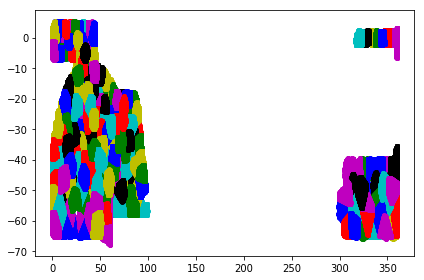

done


In [80]:
import kmeans_radec
import os
from scipy import spatial
from kmeans_radec import KMeans, kmeans_sample


# INPUT:   ****************************
'''
you might want to use 100 jackknife if you're using
the sumbsampled version of the catalog/
'''
n_jck = 200 #!!!!!!


def jaccknife_regions(ra,dec,number_of_regions,label_jck = None, centers_jck = None, v = False):
    new_cat=np.array(zip(ra, dec))
    A=new_cat[np.random.randint(new_cat.shape[0],size=20000),:]
    
    if not v:
        centers_jck= kmeans_radec.kmeans_sample(A,number_of_regions,maxiter=100,tol=1e-05,verbose=0)
        np.savetxt(label_jck, centers_jck.centers)
        centers_tree = spatial.cKDTree(centers_jck.centers[:,[0,1]])
        _ , hpix= centers_tree.query(np.array(zip(ra,dec)))
        return centers_tree, hpix, centers_jck.centers[:,[0,1]]   
    
    centers_tree = spatial.cKDTree(centers_jck[:,[0,1]])
    _ , hpix= centers_tree.query(np.array(zip(ra,dec)))
    return centers_tree, hpix, centers_jck[:,[0,1]]

# define jackknife regions **********************
mask_jkkk = (mas_desy3!=0.)
area = np.array(range(hp.nside2npix(nside_fast_corr)))[mask_jkkk]
dech,rah = IndexToDeclRa(area, nside_fast_corr)
   
label_jck= "./centers200spn.txt"
if  os.path.exists(label_jck):
    centers=np.array(np.loadtxt(label_jck)) 
    centers_tree, hpix, centers = jaccknife_regions(rah,dech,n_jck,label_jck, centers, v = True)
else:
    centers_tree, hpix, centers = jaccknife_regions(rah,dech,n_jck,label_jck)

# plot jackknife regions in case ********************
color_i=[]
for gg in range(1000):
    color_i.append('b')
    color_i.append('g')
    color_i.append('r')
    color_i.append('c')
    color_i.append('m')
    color_i.append('y')
    color_i.append('k')

fig= plt.figure()
ax = fig.add_subplot(111)
for j in range(len(np.unique(hpix))):
    mask2=hpix==j
    plt.plot(rah[mask2], dech[mask2], 'o', ms=4, alpha=1., color=color_i[j])
plt.show()


# jackknife assignment to ymap!
bbb = np.vstack([np.array(rayall).T,
                             np.array(decyall).T]).T
from scipy import spatial
from astropy.table import Table
_, hpix_s =  (spatial.cKDTree(centers)).query(bbb)


# jackknife assignment to mastercat
for ii in range(len(bins_min)):
    bbb = np.vstack([np.array(cat[ii][2]).T,
                                 np.array(cat[ii][3]).T]).T
    from scipy import spatial
    from astropy.table import Table
    _, hpp =  (spatial.cKDTree(centers)).query(bbb)
    cat[ii][4] = hpp
    
label_dist= "./dist200spn.txt"
distance_calc(label_dist,rah,dech,hpix, n_jck, centers)


Nbins = 20

min_theta = 1./60.
max_theta = 250./60.
number_of_cores = 64
bin_slope = 0.1


rewrite = False
runs_path = dict()
count = 0

conf = {'nbins': Nbins,
            'min_sep': min_theta,
            'max_sep': max_theta,
            'sep_units': 'degrees',
            'bin_slop': bin_slope,
            'nodes': number_of_cores  # parameter for treecorr
            }

label_jck_y1 = "./centers200_y1.txt"
label_jck= "./centers200spn.txt"


runs_path=dict()
count =0




'''

# SET UP TSZ X TSZ
name_foder =name_folder_x
outp_fold = name_foder+'/pairs/'
name_output  = name_foder+'/_YY_'

if not os.path.exists(name_foder):    
    os.mkdir(name_foder)

mute_dict = dict()
mute_dict['conf'] = conf
mute_dict['label_dist'] = label_dist
mute_dict['ra_1'] = rayall
mute_dict['dec_1'] =  decyall
mute_dict['ra_2'] = rayall
mute_dict['dec_2'] = decyall
mute_dict['hpix1'] =  hpix_s
mute_dict['hpix2'] = hpix_s
mute_dict['w1'] = np.ones(len(hpix_s))
mute_dict['w2'] = np.ones(len(hpix_s))

mute_dict['g1_1'] = np.zeros(len(hpix_s))
mute_dict['g2_1'] = np.zeros(len(hpix_s))
mute_dict['k1'] = ymap
mute_dict['k2'] = ymap

mute_dict['centers']=centers
mute_dict['n_jck']=n_jck
mute_dict['path_pkl'] = name_output+'_tsz_'
mute_dict['outp_fold'] = outp_fold
mute_dict['label'] ='{0}_tsz_'.format("full")
mute_dict['type'] = 'KK'
if not os.path.exists(name_output):
    os.mkdir(name_output)
path_run  = name_output+"_tsz_"
runs_path[count]=path_run
save_obj(path_run,mute_dict)
count+=1
'''

  
    
# SET UP shear X shear
for ii in range(len(bins_min)):
 for jj in range(len(bins_min)):  
        
    name_foder =name_folder_x
    outp_fold = name_foder+'/pairs/'
    name_output  = name_foder+'/_shearshear_{0}_{1}_'.format(ii,jj)
    
    if not os.path.exists(name_foder):    
        os.mkdir(name_foder)



    mute_dict = dict()
    mute_dict['conf'] = conf
    mute_dict['label_dist'] = label_dist
    mute_dict['ra_1'] = cat[ii][2]
    mute_dict['dec_1'] =  cat[ii][3]
    mute_dict['ra_2'] = cat[jj][2]
    mute_dict['dec_2'] = cat[jj][3]
    mute_dict['hpix1'] =  cat[ii][4]
    mute_dict['hpix2'] =cat[jj][4]
    mute_dict['w1'] = np.ones(len(cat[ii][4]))
    mute_dict['w2'] = np.ones(len(cat[jj][4]))

    mute_dict['g1_1'] = cat[ii][0]
    mute_dict['g2_1'] = cat[ii][1]
    mute_dict['g1_2'] = cat[jj][0]
    mute_dict['g2_2'] = cat[jj][1]

    mute_dict['centers']=centers
    mute_dict['n_jck']=n_jck
    mute_dict['path_pkl'] = name_output+'_tsz_'
    mute_dict['outp_fold'] = outp_fold
    mute_dict['label'] ='{0}_{1}_shearshear_'.format(ii,jj)
    mute_dict['type'] = 'GG'
    if not os.path.exists(name_output):
        os.mkdir(name_output)
    path_run  = name_output+"_tsz_"
    runs_path[count]=path_run
    save_obj(path_run,mute_dict)
    count+=1   

    

print ('done')
save_obj("runs_path_tsz",runs_path)

print ('now run python run_tsz.py [in parallel :) ]')

# prepare des x planck

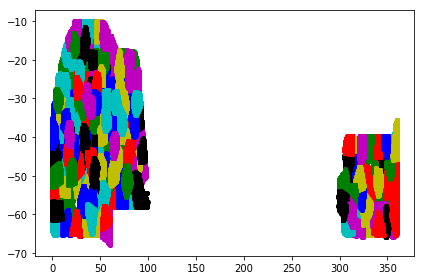

done


In [12]:
import kmeans_radec
import os
from scipy import spatial
from kmeans_radec import KMeans, kmeans_sample


# INPUT:   ****************************
'''
you might want to use 100 jackknife if you're using
the sumbsampled version of the catalog/
'''
n_jck = 200 #!!!!!!


def jaccknife_regions(ra,dec,number_of_regions,label_jck = None, centers_jck = None, v = False):
    new_cat=np.array(zip(ra, dec))
    A=new_cat[np.random.randint(new_cat.shape[0],size=20000),:]
    
    if not v:
        centers_jck= kmeans_radec.kmeans_sample(A,number_of_regions,maxiter=100,tol=1e-05,verbose=0)
        np.savetxt(label_jck, centers_jck.centers)
        centers_tree = spatial.cKDTree(centers_jck.centers[:,[0,1]])
        _ , hpix= centers_tree.query(np.array(zip(ra,dec)))
        return centers_tree, hpix, centers_jck.centers[:,[0,1]]   
    
    centers_tree = spatial.cKDTree(centers_jck[:,[0,1]])
    _ , hpix= centers_tree.query(np.array(zip(ra,dec)))
    return centers_tree, hpix, centers_jck[:,[0,1]]

# define jackknife regions **********************
mask_jkkk = (ny_map_sp1!=0.) & ( y_map_sp1!=0.) & (mas_desy3!=0.)
area = np.array(range(hp.nside2npix(nside_fast_corr)))[mask_jkkk]
dech,rah = IndexToDeclRa(area, nside_fast_corr)
   
label_jck= "./centers200spn_planck.txt"
if  os.path.exists(label_jck):
    centers=np.array(np.loadtxt(label_jck)) 
    centers_tree, hpix, centers = jaccknife_regions(rah,dech,n_jck,label_jck, centers, v = True)
else:
    centers_tree, hpix, centers = jaccknife_regions(rah,dech,n_jck,label_jck)

# plot jackknife regions in case ********************
color_i=[]
for gg in range(1000):
    color_i.append('b')
    color_i.append('g')
    color_i.append('r')
    color_i.append('c')
    color_i.append('m')
    color_i.append('y')
    color_i.append('k')

fig= plt.figure()
ax = fig.add_subplot(111)
for j in range(len(np.unique(hpix))):
    mask2=hpix==j
    plt.plot(rah[mask2], dech[mask2], 'o', ms=4, alpha=1., color=color_i[j])
plt.show()


# jackknife assignment to ymap!
bbb = np.vstack([np.array(rayall).T,
                             np.array(decyall).T]).T
from scipy import spatial
from astropy.table import Table
_, hpix_s =  (spatial.cKDTree(centers)).query(bbb)


# jackknife assignment to mastercat
for ii in range(len(bins_min)):
    bbb = np.vstack([np.array(cat[ii][2]).T,
                                 np.array(cat[ii][3]).T]).T
    from scipy import spatial
    from astropy.table import Table
    _, hpp =  (spatial.cKDTree(centers)).query(bbb)
    cat[ii][4] = hpp
    
label_dist= "./dist200spn_planck.txt"
distance_calc(label_dist,rah,dech,hpix, n_jck, centers)


Nbins = 20

min_theta = 1./60.
max_theta = 250./60.
number_of_cores = 64
bin_slope = 0.1


rewrite = False
runs_path = dict()
count = 0

conf = {'nbins': Nbins,
            'min_sep': min_theta,
            'max_sep': max_theta,
            'sep_units': 'degrees',
            'bin_slop': bin_slope,
            'nodes': number_of_cores  # parameter for treecorr
            }

label_jck_y1 = "./centers200_y1.txt"
label_jck= "./centers200spn_planck.txt"


runs_path=dict()
count =0




'''

# SET UP TSZ X TSZ
name_foder =name_folder_x
outp_fold = name_foder+'/pairs/'
name_output  = name_foder+'/_YY_'

if not os.path.exists(name_foder):    
    os.mkdir(name_foder)

mute_dict = dict()
mute_dict['conf'] = conf
mute_dict['label_dist'] = label_dist
mute_dict['ra_1'] = rayall
mute_dict['dec_1'] =  decyall
mute_dict['ra_2'] = rayall
mute_dict['dec_2'] = decyall
mute_dict['hpix1'] =  hpix_s
mute_dict['hpix2'] = hpix_s
mute_dict['w1'] = np.ones(len(hpix_s))
mute_dict['w2'] = np.ones(len(hpix_s))

mute_dict['g1_1'] = np.zeros(len(hpix_s))
mute_dict['g2_1'] = np.zeros(len(hpix_s))
mute_dict['k1'] = ymap
mute_dict['k2'] = ymap

mute_dict['centers']=centers
mute_dict['n_jck']=n_jck
mute_dict['path_pkl'] = name_output+'_tsz_'
mute_dict['outp_fold'] = outp_fold
mute_dict['label'] ='{0}_tsz_'.format("full")
mute_dict['type'] = 'KK'
if not os.path.exists(name_output):
    os.mkdir(name_output)
path_run  = name_output+"_tsz_"
runs_path[count]=path_run
save_obj(path_run,mute_dict)
count+=1
'''

# SET UP TSZ X SHEAR
for ii in range(len(bins_min)):
   
    name_foder =name_folder_x
    outp_fold = name_foder+'/pairs/'
    name_output  = name_foder+'/_Yshear_{0}_'.format(ii)
    
    if not os.path.exists(name_foder):    
        os.mkdir(name_foder)



    mute_dict = dict()
    mute_dict['conf'] = conf
    mute_dict['label_dist'] = label_dist
    mute_dict['ra_1'] = cat[ii][2]
    mute_dict['dec_1'] =  cat[ii][3]
    mute_dict['ra_2'] = rayall
    mute_dict['dec_2'] = decyall
    mute_dict['hpix1'] =  cat[ii][4]
    mute_dict['hpix2'] = hpix_s
    mute_dict['w1'] = (cat[ii][5])
    mute_dict['w2'] = np.ones(len(hpix_s))

    mute_dict['g1_1'] = cat[ii][0]
    mute_dict['g2_1'] = cat[ii][1]
    mute_dict['k1'] = ymap
    mute_dict['k2'] = ymap

    mute_dict['centers']=centers
    mute_dict['n_jck']=n_jck
    mute_dict['path_pkl'] = name_output+'_tsz_'
    mute_dict['outp_fold'] = outp_fold
    mute_dict['label'] ='{0}_tsz_'.format(ii)
    mute_dict['type'] = 'KG'
    if not os.path.exists(name_output):
        os.mkdir(name_output)
    path_run  = name_output+"_tsz_"
    runs_path[count]=path_run
    save_obj(path_run,mute_dict)
    count+=1
            
  
    
    

print ('done')
save_obj("runs_path_tsz",runs_path)


print ('now run python run_tsz.py [in parallel :) ]')

# make 2pt files (data & sims)

In [9]:
import twopoint
import pyfits as pf
# load template *****
fiducial = pf.open('/global/cscratch1/sd/mgatti/Cosmic_shear/y3-3x2pt-methods/cosmosis/data_vectors/v0.40_fiducial.fits')
# load n(z) ******
import numpy as np
from scipy.signal import savgol_filter
nzsamp = np.load('/global/cscratch1/sd/alexalar/desy3data/Nz_samples/v0.50/3sdir_fid_zsamplefid//nz_samples.npy')
nzsamp = savgol_filter(nzsamp,5,2,axis=2)
nz_tot=np.mean(nzsamp,axis=0)
z_samp = np.load('/global/cscratch1/sd/alexalar/desy3data/Nz_samples/sv_sn_test1///bin_centers.npy')
z_edge_samp = np.load('/global/cscratch1/sd/alexalar/desy3data/Nz_samples/sv_sn_test1///bin_edges.npy')

# make n(z)
Nz = []
from scipy.interpolate import interp1d
for i in range(4):
    f = interp1d(z_samp,nz_tot[i])
    nz_e = np.zeros(len(fiducial[6].data['Z_MID']))
    mask = fiducial[6].data['Z_MID'] > z_samp[0]
    nz_e[mask] = f(fiducial[6].data['Z_MID'][mask])
    Nz.append(nz_e)
nz_full  = twopoint.NumberDensity("nz_source", fiducial[6].data['Z_LOW'], fiducial[6].data['Z_MID'], fiducial[6].data['Z_HIGH'], Nz)

Nz = []
from scipy.interpolate import interp1d
for i in range(5):
    Nz.append(fiducial[7].data['BIN{0}'.format(i+1)])
nz_LENS  = twopoint.NumberDensity("nz_lens", fiducial[7].data['Z_LOW'], fiducial[7].data['Z_MID'], fiducial[7].data['Z_HIGH'], Nz)





# this is to use the same theta as in the theory code - 
import math
theta1 = np.array([0.00083136, 0.00103403, 0.00130175, 0.0016388 , 0.0020631  ,0.00259727,
 0.00326974, 0.00411633, 0.00518211, 0.00652383, 0.00821295, 0.0103394,
 0.01301642, 0.01638656, 0.02062929, 0.02597051, 0.03269466, 0.04115979,
 0.05181666, 0.06483276])
theta = theta1*(60./((2*math.pi)/360))


import pickle
def load_obj(name):
    
        try:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f)#, encoding='latin1')
        except:
            with open(name + '.pkl', 'rb') as f:
                return pickle.load(f, encoding='latin1')
            
            

import sys, os
sys.path.insert(0,  '/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis//cosmosis-standard-library/likelihood/2pt')

from enum34 import Enum
class Types(Enum):
    """
    This is an enumeration - a list of possible values with names and code values
    that we can use in FITS headers.

    It enumerates the different quantities that a two-point measurement can correlate.
    For example, CMB T,E,B, lensing E and B, galaxy position and magnification.

    It specifies the quantity and whether we are in Fourier space or real space.

    One special case is xi_{-} and xi_{+} in galaxy shear.  These values are already
    correlations of combinations of E and B modes. We denote this as xi_{++} and xi_{--} here.

    """
    galaxy_position_fourier = "GPF"
    galaxy_shear_emode_fourier = "GEF"
    galaxy_shear_bmode_fourier = "GBF"
    galaxy_position_real = "GPR"
    galaxy_shear_plus_real = "G+R"
    galaxy_shear_minus_real = "G-R"
    cmb_kappa_real = "CKR"
    compton = 'compton'
    compton1 = 'compton1'

    @classmethod
    def lookup(cls, value):
        for T in cls:
            if T.value == value:
                return T
            
  
                   
store_xipxim = dict()
store_tsz = dict()
count =0
for l in range(4):
    for s in range(4):
        try:
            store_xipxim["{0} {1}".format(l,s)] = dict()
            
            path_save = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_tsz/rerun_mastercat_4_20/'
            mute = load_obj(path_save+'_shearshear_{0}_{1}__tsz__tsz'.format(l,s))
            store_xipxim["{0} {1}".format(l,s)]["xip"] = mute['high']['xip1']
            store_xipxim["{0} {1}".format(l,s)]["xim"] = mute['high']['xim1']
            
            if l>= s:
                if count == 0:
                    covp = mute["high"]["corr_jckp"].T
                    covm = mute["high"]["corr_jckm"].T

                else:
                    covp = np.vstack([covp,mute["high"]["corr_jckp"].T])
                    covm = np.vstack([covm,mute["high"]["corr_jckm"].T])

                count+=1
        except:
            pass
count =0
for l in range(4):
    store_tsz["{0}".format(l)] = dict()
    y3 = load_obj(path_save +'/_Yshear_{0}__tsz__tsz'.format(l))
    y3_ACT = load_obj(path_save +'/_YACT_shear_{0}__tsz_ACT__tsz'.format(l))
    
    store_tsz["{0}".format(l)]["tsz"] = y3['high']['xip1']
    store_tsz["{0}".format(l)]["tsz ACT"] = y3_ACT['high']['xip1']
    if count == 0:
        cov_tsz = y3["high"]["corr_jckp"].T
        cov_tsz_ACT = y3_ACT["high"]["corr_jckm"].T
    else:
        cov_tsz = np.vstack([cov_tsz,y3["high"]["corr_jckp"].T])
        cov_tsz_ACT = np.vstack([cov_tsz_ACT,y3_ACT["high"]["corr_jckm"].T])
    count+=1
cov_f = np.vstack([covp,covm,cov_tsz])
cov_f_ACT = np.vstack([covp,covm,cov_tsz_ACT])
cov_f_planck_ACT = np.vstack([covp,covm,cov_tsz,cov_tsz_ACT])

cov_dict = covariance_jck(cov_f,200,"jackknife")
cov_dict_ACT = covariance_jck(cov_f_ACT,200,"jackknife")
cov_dict_planck_ACT = covariance_jck(cov_f_planck_ACT,200,"jackknife")





angular_bins = 20
tsz_dv = np.zeros(20*4)
tsz_ACT_dv = np.zeros(20*4) 
tsz_bin1 = np.zeros(20*4) 
tsz_bin2 = np.zeros(20*4) 
tsz_angular_bin = np.zeros(20*4) 
tsz_angle = np.zeros(20*4) 
count = 0
for l in range(4):
    tsz_dv[count*angular_bins:(count+1)*angular_bins] = store_tsz["{0}".format(l)]["tsz"]
    tsz_ACT_dv[count*angular_bins:(count+1)*angular_bins] = store_tsz["{0}".format(l)]["tsz ACT"]
    tsz_bin1[count*angular_bins:(count+1)*angular_bins] = l+1
    tsz_bin2[count*angular_bins:(count+1)*angular_bins] = l+1
        
    tsz_angular_bin[count*angular_bins:(count+1)*angular_bins] = np.arange(len(theta))
    tsz_angle[count*angular_bins:(count+1)*angular_bins] = theta
    count +=1
            
            
            
            
angular_bins = 20
cosmic_shear_p = np.zeros(20*10)
cosmic_shear_m = np.zeros(20*10) 
bin1 = np.zeros(20*10) 
bin2 = np.zeros(20*10) 
angular_bin = np.zeros(20*10) 
angle = np.zeros(20*10) 
count = 0
for l in range(4):
    for s in range(4):
        if l>=s:
               cosmic_shear_p[count*angular_bins:(count+1)*angular_bins] = store_xipxim["{0} {1}".format(l,s)]["xip"]
               cosmic_shear_m[count*angular_bins:(count+1)*angular_bins] = store_xipxim["{0} {1}".format(l,s)]["xim"]
       

               bin1[count*angular_bins:(count+1)*angular_bins] = l+1
               bin2[count*angular_bins:(count+1)*angular_bins] = s+1
        
               angular_bin[count*angular_bins:(count+1)*angular_bins] = np.arange(len(theta))
               angle[count*angular_bins:(count+1)*angular_bins] = theta
               count +=1

            
shearp = twopoint.SpectrumMeasurement('xip', (bin1, bin2),
                                                     (twopoint.Types.galaxy_shear_plus_real,
                                                      twopoint.Types.galaxy_shear_plus_real),
                                                     ['no_nz', 'no_nz'], 'SAMPLE', angular_bin, cosmic_shear_p,angle=angle, angle_unit='arcmin')

shearm = twopoint.SpectrumMeasurement('xim', (bin1, bin2),
                                                     (twopoint.Types.galaxy_shear_minus_real,
                                                      twopoint.Types.galaxy_shear_minus_real),
                                                     ['no_nz', 'no_nz'], 'SAMPLE', angular_bin, cosmic_shear_m,angle=angle, angle_unit='arcmin')

tsz_m = twopoint.SpectrumMeasurement('compton_shear', (tsz_bin1, tsz_bin2),
                                                     (twopoint.Types.galaxy_shear_plus_real,Types.compton),
                                                     ['no_nz', 'no_nz'], 'SAMPLE', tsz_angular_bin, tsz_dv,angle=tsz_angle, angle_unit='arcmin')

tsz_ACT_m = twopoint.SpectrumMeasurement('compton_shear', (tsz_bin1, tsz_bin2),
                                                     (twopoint.Types.galaxy_shear_plus_real,Types.compton),
                                                     ['no_nz', 'no_nz'], 'SAMPLE', tsz_angular_bin, tsz_ACT_dv,angle=tsz_angle, angle_unit='arcmin')


tsz_ACT_m2 = twopoint.SpectrumMeasurement('compton1_shear', (tsz_bin1, tsz_bin2),
                                                     (twopoint.Types.galaxy_shear_plus_real,Types.compton1),
                                                     ['no_nz', 'no_nz'], 'SAMPLE', tsz_angular_bin, tsz_ACT_dv,angle=tsz_angle, angle_unit='arcmin')


print ('done')



obj = twopoint.TwoPointFile([shearp,shearm,tsz_m], [nz_full,nz_LENS], windows=None, covmat_info=None)

names = [s.name for s in obj.spectra]
lengths = [len(s) for s in obj.spectra]
n = sum(lengths)
cov_dict["cov"].shape==(n,n)
obj.covmat_info = twopoint.CovarianceMatrixInfo("COVMAT", names, lengths, cov_dict["cov"])

obj_ACT = twopoint.TwoPointFile([shearp,shearm,tsz_ACT_m], [nz_full,nz_LENS], windows=None, covmat_info=None)

names = [s.name for s in obj_ACT.spectra]
lengths = [len(s) for s in obj_ACT.spectra]
n = sum(lengths)
cov_dict["cov"].shape==(n,n)
obj_ACT.covmat_info = twopoint.CovarianceMatrixInfo("COVMAT", names, lengths, cov_dict_ACT["cov"])

import os
try:
    os.remove('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_Planck.fits')
except:
    pass
obj.to_fits('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_Planck.fits') 
try:
    os.remove('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_ACT.fits')
except:
    pass
obj_ACT.to_fits('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_ACT.fits') 



obj_ACT = twopoint.TwoPointFile([shearp,shearm,tsz_m,tsz_ACT_m2], [nz_full,nz_LENS], windows=None, covmat_info=None)

names = [s.name for s in obj_ACT.spectra]
lengths = [len(s) for s in obj_ACT.spectra]
n = sum(lengths)
cov_dict["cov"].shape==(n,n)
obj_ACT.covmat_info = twopoint.CovarianceMatrixInfo("COVMAT", names, lengths, cov_dict_planck_ACT["cov"])


try:
    os.remove('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_planck_ACT.fits')
except:
    pass
obj_ACT.to_fits('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_planck_ACT.fits') 

print ('done')

done
done


# check covariance and DV from cosmosis

0 0 kk kk


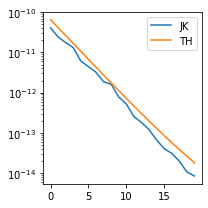

1 1 kk kk


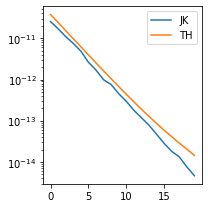

2 2 kk kk


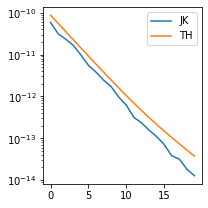

3 3 kk kk


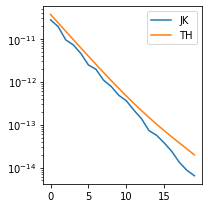

4 4 kk kk


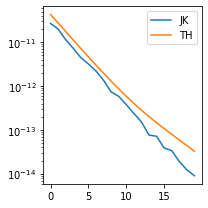

5 5 kk kk


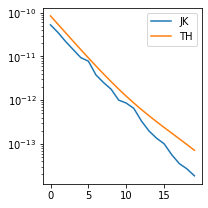

6 6 kk kk


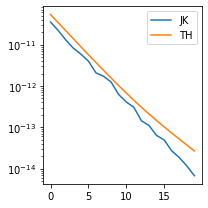

7 7 kk kk


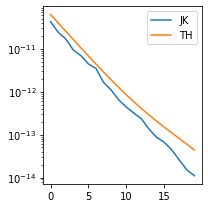

8 8 kk kk


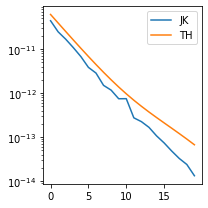

9 9 kk kk


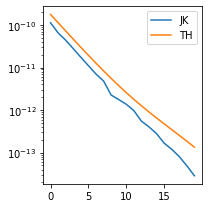

10 10 kkm kkm


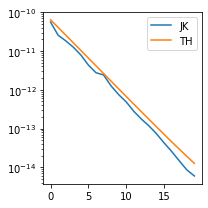

11 11 kkm kkm


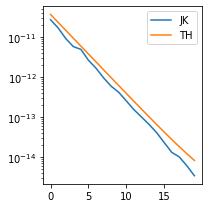

12 12 kkm kkm


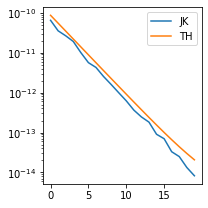

13 13 kkm kkm


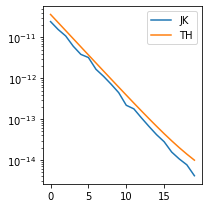

14 14 kkm kkm


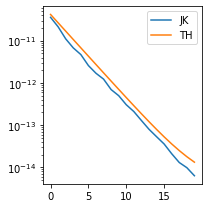

15 15 kkm kkm


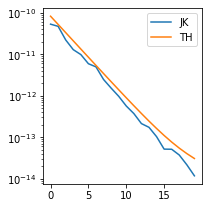

16 16 kkm kkm


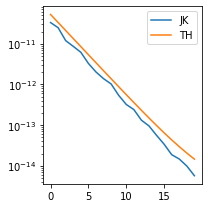

17 17 kkm kkm


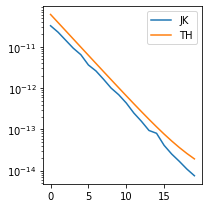

18 18 kkm kkm


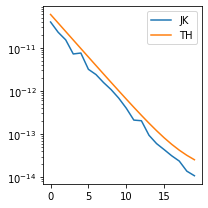

19 19 kkm kkm


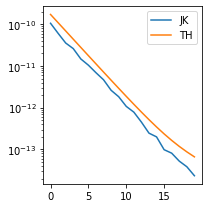

20 20 gty gty


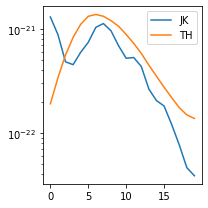

21 21 gty gty


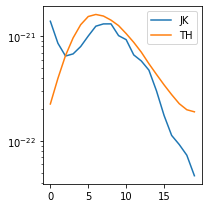

22 22 gty gty


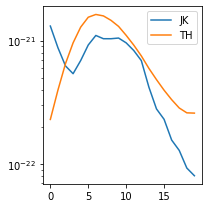

23 23 gty gty


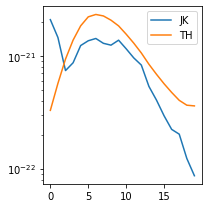

24 24 gty gty


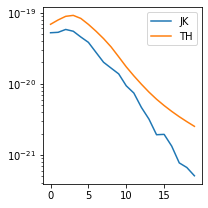

25 25 gty gty


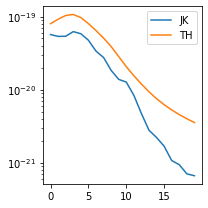

26 26 gty gty


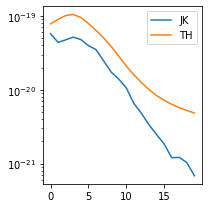

27 27 gty gty


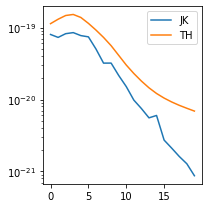

done
done
done
done


In [98]:
import pyfits as pf
fiducial = pf.open('/global/cscratch1/sd/mgatti/Cosmic_shear/y3-3x2pt-methods/cosmosis/data_vectors/v0.40_fiducial.fits')

path_results = '/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis/ACTxDESY3/src/results/'
dd = pickle.load(open(path_results +'DV_obj_temp_kk_gty_plancky3_beamed_bf_kk_gty.pk','rb'),fix_imports=True,encoding='latin')
dd_ACT = pickle.load(open(path_results +'DV_obj_temp_kk_gty_acty3_beamed_bf_kk_gty.pk','rb'),fix_imports=True,encoding='latin')
ind_th_sel_ACT = np.where((dd_ACT.fftcovtot_dict['ky_ky']['theta'] > 2.5) & (dd_ACT.fftcovtot_dict['ky_ky']['theta'] < 250.0))[0]
ind_th_sel = np.where((dd.fftcovtot_dict['ky_ky']['theta'] > 2.5) & (dd.fftcovtot_dict['ky_ky']['theta'] < 250.0))[0]
n_tot = 20*10+20*10+20*4     
n_tot2 = 20*10+20*10+20*4+20*4    
cov_theory = np.zeros((n_tot,n_tot))     
cov_theory_ACT = np.zeros((n_tot,n_tot))  
cov_theory_planck_ACT = np.zeros((n_tot2,n_tot2))  
comb = []
comb2 = []
for l in range(4):
    for s in range(4):
        if l>=s:
            comb.append([l,s,'kk','kk'])
            comb2.append([l,s,'kk','kk'])
for l in range(4):
    for s in range(4):
        if l>=s:
            comb.append([l,s,'kkm','kkm'])
            comb2.append([l,s,'kkm','kkm'])
for l in range(4):
    comb.append([l,-1,'kk','gty'])
    comb2.append([l,-1,'kk','gty'])
for l in range(4):
    comb2.append([l,-1,'kk','gty'])
    
    
for i,c1 in enumerate(comb2):
    for j,c2 in enumerate(comb2):
        #print (c1,c2)
        count = False
        c_mute = np.zeros(((angular_bins),(angular_bins)))
        c_mute_ACT = np.zeros(((angular_bins),(angular_bins)))
        
        try:
            c_mute_ACT = dd_ACT.fftcovtot_dict['{0}_{1}'.format(c1[3],c2[3])]['bin_' + str(c1[1]+1) + '_' + str(c1[0]+1) + '_' + str(c2[1]+1) + '_' + str(c2[0]+1)][ind_th_sel, :][:,ind_th_sel]
            c_mute = dd.fftcovtot_dict['{0}_{1}'.format(c1[3],c2[3])]['bin_' + str(c1[1]+1) + '_' + str(c1[0]+1) + '_' + str(c2[1]+1) + '_' + str(c2[0]+1)][ind_th_sel, :][:,ind_th_sel]
            count = True
        except:
            pass
        try:
            c_mute_ACT = dd_ACT.fftcovtot_dict['{0}_{1}'.format(c2[3],c1[3])]['bin_' + str(c2[1]+1) + '_' + str(c2[0]+1) + '_' + str(c1[1]+1) + '_' + str(c1[0]+1)][ind_th_sel, :][:,ind_th_sel]
            c_mute = dd.fftcovtot_dict['{0}_{1}'.format(c2[3],c1[3])]['bin_' + str(c2[1]+1) + '_' + str(c2[0]+1) + '_' + str(c1[1]+1) + '_' + str(c1[0]+1)][ind_th_sel, :][:,ind_th_sel]
            count = True
        except:
            pass
            
        try:
            c_mute_ACT = dd_ACT.fftcovtot_dict['{0}_{1}'.format(c1[3],c2[3])]['bin_' + str(c1[0]+1) + '_' + str(c1[1]+1) + '_' + str(c2[0]+1) + '_' + str(c2[1]+1)][ind_th_sel, :][:,ind_th_sel]
            c_mute = dd.fftcovtot_dict['{0}_{1}'.format(c1[3],c2[3])]['bin_' + str(c1[0]+1) + '_' + str(c1[1]+1) + '_' + str(c2[0]+1) + '_' + str(c2[1]+1)][ind_th_sel, :][:,ind_th_sel]
            count = True
        except:
            pass
        try:
            c_mute_ACT = dd_ACT.fftcovtot_dict['{0}_{1}'.format(c2[3],c1[3])]['bin_' + str(c2[0]+1) + '_' + str(c2[1]+1) + '_' + str(c1[0]+1) + '_' + str(c1[1]+1)][ind_th_sel, :][:,ind_th_sel]
            c_mute = dd.fftcovtot_dict['{0}_{1}'.format(c2[3],c1[3])]['bin_' + str(c2[0]+1) + '_' + str(c2[1]+1) + '_' + str(c1[0]+1) + '_' + str(c1[1]+1)][ind_th_sel, :][:,ind_th_sel]
            count = True
        except:
            pass
        
        
        try:
            c_mute_ACT = dd_ACT.fftcovtot_dict['{0}_{1}'.format(c2[3],c1[3])]['bin_' + str(c1[0]+1) + '_' + str(c1[1]+1) + '_' + str(c2[0]+1) + '_' + str(c2[1]+1)][ind_th_sel, :][:,ind_th_sel]
            c_mute = dd.fftcovtot_dict['{0}_{1}'.format(c2[3],c1[3])]['bin_' + str(c1[0]+1) + '_' + str(c1[1]+1) + '_' + str(c2[0]+1) + '_' + str(c2[1]+1)][ind_th_sel, :][:,ind_th_sel]
            count = True
        except:
            pass
            
        try:
            c_mute_ACT = dd_ACT.fftcovtot_dict['{0}_{1}'.format(c1[3],c2[3])]['bin_' + str(c1[0]+1) + '_' + str(c1[1]+1) + '_' + str(c2[1]+1) + '_' + str(c2[0]+1)][ind_th_sel, :][:,ind_th_sel]
            c_mute = dd.fftcovtot_dict['{0}_{1}'.format(c1[3],c2[3])]['bin_' + str(c1[0]+1) + '_' + str(c1[1]+1) + '_' + str(c2[1]+1) + '_' + str(c2[0]+1)][ind_th_sel, :][:,ind_th_sel]
            count = True
        except:
            pass
        
    
        try:
            c_mute_ACT = dd_ACT.fftcovtot_dict['{0}_{1}'.format(c2[3],c1[3])]['bin_' + str(c1[1]+1) + '_' + str(c1[0]+1) + '_' + str(c2[0]+1) + '_' + str(c2[1]+1)][ind_th_sel, :][:,ind_th_sel]
            c_mute = dd.fftcovtot_dict['{0}_{1}'.format(c2[3],c1[3])]['bin_' + str(c1[1]+1) + '_' + str(c1[0]+1) + '_' + str(c2[0]+1) + '_' + str(c2[1]+1)][ind_th_sel, :][:,ind_th_sel]
            count = True
        except:
            #print ('{0}_{1}'.format(c2[3],c1[3]),'bin_' + str(c1[1]+1) + '_' + str(c1[0]+1) + '_' + str(c2[0]+1) + '_' + str(c2[1]+1))
            pass
            
        try:
            c_mute_ACT = dd_ACT.fftcovtot_dict['{0}_{1}'.format(c2[3],c1[3])]['bin_' + str(c2[0]+1) + '_' + str(c2[1]+1) + '_' + str(c1[1]+1) + '_' + str(c1[0]+1)][ind_th_sel, :][:,ind_th_sel]
            c_mute = dd.fftcovtot_dict['{0}_{1}'.format(c2[3],c1[3])]['bin_' + str(c2[0]+1) + '_' + str(c2[1]+1) + '_' + str(c1[1]+1) + '_' + str(c1[0]+1)][ind_th_sel, :][:,ind_th_sel]
            count = True
        except:
            #print ('{0}_{1}'.format(c2[3],c1[3]),'bin_' + str(c2[0]+1) + '_' + str(c2[1]+1) + '_' + str(c1[1]+1) + '_' + str(c1[0]+1))
            pass
        #if not count:
            #if ('kkm' not in c2) or ('kkm' not in c1):
                #print ('failed ',c2,c1)
                
        try:
            cov_theory_ACT[i*angular_bins:(i+1)*angular_bins,j*angular_bins:(j+1)*angular_bins] = c_mute_ACT
            cov_theory[i*angular_bins:(i+1)*angular_bins,j*angular_bins:(j+1)*angular_bins] = c_mute
            cov_theory_planck_ACT[i*angular_bins:(i+1)*angular_bins,j*angular_bins:(j+1)*angular_bins] = c_mute
        except:
            cov_theory_planck_ACT[i*angular_bins:(i+1)*angular_bins,j*angular_bins:(j+1)*angular_bins] = c_mute_ACT
        
        djk = cov_dict_planck_ACT["cov"][i*angular_bins:(i+1)*angular_bins,j*angular_bins:(j+1)*angular_bins]
        dth = cov_theory_planck_ACT[i*angular_bins:(i+1)*angular_bins,j*angular_bins:(j+1)*angular_bins]
        
        if i==j:
            fig, ax = plt.subplots(1,1, figsize=(3,3.))
            ax.set_yscale('log')

            print (i,j,c1[-1],c2[-1])
            plt.plot(djk.diagonal(),label='JK')
            plt.plot(dth.diagonal(),label='TH')
            plt.legend()
            plt.show()
        

#cov_theory_fiducial = fiducial[1].data[:400,:400]
#cov_theory[:400,:400] = copy.copy(cov_theory_fiducial)
#
#cov_theory_fiducial = fiducial[1].data[:400,:400]
#cov_theory_ACT[:400,:400] = copy.copy(cov_theory_fiducial)
#
#cov_theory_fiducial = fiducial[1].data[:400,:400]
#cov_theory_planck_ACT[:400,:400] = copy.copy(cov_theory_fiducial)

## theory covariance (fiducial xip-xim + shivam tsz.)
#for i in range(cov_theory.shape[0]):
#    for j in range(cov_theory.shape[0]):
#        if i!=j:
#            cov_theory[i,j]=0.

obj = twopoint.TwoPointFile([shearp,shearm,tsz_m], [nz_full,nz_LENS], windows=None, covmat_info=None)

names = [s.name for s in obj.spectra]
lengths = [len(s) for s in obj.spectra]
n = sum(lengths)
cov_dict["cov"].shape==(n,n)
obj.covmat_info = twopoint.CovarianceMatrixInfo("COVMAT", names, lengths, cov_theory)

obj_ACT = twopoint.TwoPointFile([shearp,shearm,tsz_ACT_m], [nz_full,nz_LENS], windows=None, covmat_info=None)

names = [s.name for s in obj_ACT.spectra]
lengths = [len(s) for s in obj_ACT.spectra]
n = sum(lengths)
cov_dict["cov"].shape==(n,n)
obj_ACT.covmat_info = twopoint.CovarianceMatrixInfo("COVMAT", names, lengths, cov_theory_ACT)

import os
try:
    os.remove('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_Planck_theorycov.fits')
except:
    pass
obj.to_fits('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_Planck_theorycov.fits') 
try:
    os.remove('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_ACT_theorycov.fits')
except:
    pass
obj_ACT.to_fits('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_ACT_theorycov.fits') 
print ('done')


obj_ACT = twopoint.TwoPointFile([shearp,shearm,tsz_m,tsz_ACT_m2], [nz_full,nz_LENS], windows=None, covmat_info=None)

names = [s.name for s in obj_ACT.spectra]
lengths = [len(s) for s in obj_ACT.spectra]
n = sum(lengths)
cov_dict["cov"].shape==(n,n)
obj_ACT.covmat_info = twopoint.CovarianceMatrixInfo("COVMAT", names, lengths, cov_theory_planck_ACT)



try:
    os.remove('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_planckACT_theorycov.fits')
except:
    pass
obj_ACT.to_fits('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_planckACT_theorycov.fits') 
print ('done')




# theory :::
angular_bins = 20
tsz_dv = np.zeros(20*4)
tsz_ACT_dv = np.zeros(20*4) 
tsz_bin1 = np.zeros(20*4) 
tsz_bin2 = np.zeros(20*4) 
tsz_angular_bin = np.zeros(20*4) 
tsz_angle = np.zeros(20*4) 
count = 0
for l in range(4):
    tsz_dv[count*angular_bins:(count+1)*angular_bins] = dd.xi_result_dict['gty']['bin_{0}_0'.format(l+1,s+1)]['tot']
    tsz_ACT_dv[count*angular_bins:(count+1)*angular_bins] = dd_ACT.xi_result_dict['gty']['bin_{0}_0'.format(l+1,s+1)]['tot']
       
    tsz_bin1[count*angular_bins:(count+1)*angular_bins] = l+1
    tsz_bin2[count*angular_bins:(count+1)*angular_bins] = l+1
        
    tsz_angular_bin[count*angular_bins:(count+1)*angular_bins] = np.arange(len(theta))
    tsz_angle[count*angular_bins:(count+1)*angular_bins] = theta
    count +=1
            
            
            
            
angular_bins = 20
cosmic_shear_p = np.zeros(20*10)
cosmic_shear_m = np.zeros(20*10) 
bin1 = np.zeros(20*10) 
bin2 = np.zeros(20*10) 
angular_bin = np.zeros(20*10) 
angle = np.zeros(20*10) 
count = 0
for l in range(4):
    for s in range(4):
        if l>=s:
               cosmic_shear_p[count*angular_bins:(count+1)*angular_bins] = dd.xi_result_dict['kk']['bin_{1}_{0}'.format(l+1,s+1)]['tot']
               cosmic_shear_m[count*angular_bins:(count+1)*angular_bins] = dd.xi_result_dict['kk']['bin_{1}_{0}'.format(l+1,s+1)]['totm']
       

               bin1[count*angular_bins:(count+1)*angular_bins] = l+1
               bin2[count*angular_bins:(count+1)*angular_bins] = s+1
        
               angular_bin[count*angular_bins:(count+1)*angular_bins] = np.arange(len(theta))
               angle[count*angular_bins:(count+1)*angular_bins] = theta
               count +=1

            
shearp = twopoint.SpectrumMeasurement('xip', (bin1, bin2),
                                                     (twopoint.Types.galaxy_shear_plus_real,
                                                      twopoint.Types.galaxy_shear_plus_real),
                                                     ['no_nz', 'no_nz'], 'SAMPLE', angular_bin, cosmic_shear_p,angle=angle, angle_unit='arcmin')

shearm = twopoint.SpectrumMeasurement('xim', (bin1, bin2),
                                                     (twopoint.Types.galaxy_shear_minus_real,
                                                      twopoint.Types.galaxy_shear_minus_real),
                                                     ['no_nz', 'no_nz'], 'SAMPLE', angular_bin, cosmic_shear_m,angle=angle, angle_unit='arcmin')

tsz_m = twopoint.SpectrumMeasurement('compton_shear', (tsz_bin1, tsz_bin2),
                                                     (twopoint.Types.galaxy_shear_plus_real,Types.compton),
                                                     ['no_nz', 'no_nz'], 'SAMPLE', tsz_angular_bin, tsz_dv,angle=tsz_angle, angle_unit='arcmin')

tsz_ACT_m = twopoint.SpectrumMeasurement('compton_shear', (tsz_bin1, tsz_bin2),
                                                     (twopoint.Types.galaxy_shear_plus_real,Types.compton),
                                                     ['no_nz', 'no_nz'], 'SAMPLE', tsz_angular_bin, tsz_ACT_dv,angle=tsz_angle, angle_unit='arcmin')


tsz_ACT_m2 = twopoint.SpectrumMeasurement('compton1_shear', (tsz_bin1, tsz_bin2),
                                                     (twopoint.Types.galaxy_shear_plus_real,Types.compton1),
                                                     ['no_nz', 'no_nz'], 'SAMPLE', tsz_angular_bin, tsz_ACT_dv,angle=tsz_angle, angle_unit='arcmin')



obj = twopoint.TwoPointFile([shearp,shearm,tsz_m], [nz_full,nz_LENS], windows=None, covmat_info=None)

names = [s.name for s in obj.spectra]
lengths = [len(s) for s in obj.spectra]
n = sum(lengths)
cov_dict["cov"].shape==(n,n)
obj.covmat_info = twopoint.CovarianceMatrixInfo("COVMAT", names, lengths, cov_theory)

obj_ACT = twopoint.TwoPointFile([shearp,shearm,tsz_ACT_m], [nz_full,nz_LENS], windows=None, covmat_info=None)

names = [s.name for s in obj_ACT.spectra]
lengths = [len(s) for s in obj_ACT.spectra]
n = sum(lengths)
cov_dict["cov"].shape==(n,n)
obj_ACT.covmat_info = twopoint.CovarianceMatrixInfo("COVMAT", names, lengths, cov_theory_ACT)

import os
try:
    os.remove('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_Planck_theorycov_theorydv.fits')
except:
    pass
obj.to_fits('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_Planck_theorycov_theorydv.fits') 
try:
    os.remove('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_ACT_theorycov_theorydv.fits')
except:
    pass
obj_ACT.to_fits('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_ACT_theorycov_theorydv.fits') 
print ('done')






obj_ACT = twopoint.TwoPointFile([shearp,shearm,tsz_m,tsz_ACT_m2], [nz_full,nz_LENS], windows=None, covmat_info=None)

names = [s.name for s in obj_ACT.spectra]
lengths = [len(s) for s in obj_ACT.spectra]
n = sum(lengths)
cov_dict["cov"].shape==(n,n)
obj_ACT.covmat_info = twopoint.CovarianceMatrixInfo("COVMAT", names, lengths, cov_theory_planck_ACT)



try:
    os.remove('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_planckACT_theorycov_theorydv.fits')
except:
    pass
obj_ACT.to_fits('/global/homes/m/mgatti/Mass_Mapping/tsz/DES_planckACT_theorycov_theorydv.fits') 
print ('done')


# read chains!

In [29]:
%matplotlib inline
import getdist
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import pyfits as pf
import getdist
import numpy as np
import pylab as mplot
import os
from getdist import plots, MCSamples
paht = '/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis/ACTxDESY3/src/chains'
p = np.genfromtxt(paht+'/chain_marco_planck_2.txt', names = True)
p1 = np.genfromtxt(paht+'/chain_marco_act_2.txt', names = True)



Removed no burn in
Removed no burn in


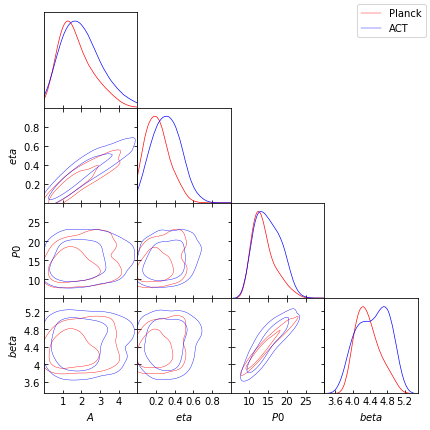

In [30]:
samples = MCSamples(settings={'mult_bias_correction_order':-1,'smooth_scale_2D':0.5, 'smooth_scale_1D':0.5},
                            samples=np.c_[p['halo_model_parametersa'],
                                         p['halo_model_parameterseta_0'],
                                         p['theory_yxp0a_m0'],
                                         p['theory_yxbetaa_m0']], weights=(p['weight']),
                names = ['A','eta','P0','beta'], 
                labels = ['A','eta','P0','beta'])

samples1 = MCSamples(settings={'mult_bias_correction_order':-1,'smooth_scale_2D':0.5, 'smooth_scale_1D':0.5},
                            samples=np.c_[p1['halo_model_parametersa'],
                                         p1['halo_model_parameterseta_0'],
                                         p1['theory_yxp0a_m0'],
                                         p1['theory_yxbetaa_m0']], weights=(p1['weight']),
                names = ['A','eta','P0','beta'], 
                labels = ['A','eta','P0','beta'])
        
g = plots.getSubplotPlotter(width_inch=6)
g.triangle_plot([samples,samples1], ['A','eta','P0','beta'],  
          filled=[False,False,True,True], colors=['red','blue'], alphas=[1,1.0,0.8,1.], lw=[3,3,3],
              legend_labels=['Planck','ACT'], 
          legend_loc='upper right', 
              contour_colors=['red','blue'], markers=[0.,0.,0.,0.],
                param_limits={'A': [0,5], 
                        'eta': [-0,1],
                        'P0': [5,30],
                        'beta': [3.5,5.5]})


AttributeError: 'GetDistPlotter' object has no attribute 'plot'

In [ ]:
muteaa = load_obj("/global/cscratch1/sd/mgatti/Cosmic_shear/output_MAP/new_cat/_0.63_0.9/y3_sm__full_noweight")
%matplotlib inline
import matplotlib.pyplot as plt
y = np.sum(muteaa["high"]['xip'].reshape(20,5*1200),axis=1)
plt.plot(y)
y = np.sum(muteaa["high"]['xim'].reshape(20,5*1200),axis=1)
plt.plot(y)

In [1]:
np

NameError: name 'np' is not defined

In [13]:
import astropy.io.fits as pf
balrog_matched = pf.open('/project/projectdirs/des/jvicente/y3/balrog/run2/balrog_matched_catalog_sof_run2_v1.3_dnf.fits')

In [16]:
true_ra = balrog_matched[1].data['true_ra']

TypeError: buffer is too small for requested array

# plots

bin:  1
Planck  S/N: 12.10
ACT  S/N: 8.19

bin:  2
Planck  S/N: 14.33
ACT  S/N: 7.27

bin:  3
Planck  S/N: 16.39
ACT  S/N: 9.98

bin:  4
Planck  S/N: 17.89
ACT  S/N: 10.27



"\n('bin: ', 1)\nACT  S/N: 8.19 [small scales]\nACT  S/N: 7.68\n\n('bin: ', 2)\nACT  S/N: 7.27 [small scales]\nACT  S/N: 6.93\n\n('bin: ', 3)\nACT  S/N: 9.98 [small scales]\nACT  S/N: 9.82\n\n('bin: ', 4)\nACT  S/N: 10.27 [small scales]\nACT  S/N: 10.56\n\n\n\n\n\n\n('bin: ', 2)\nPlanck  S/N: 14.81\n\n\n('bin: ', 3)\nPlanck  S/N: 16.46\n\n\n('bin: ', 4)\nPlanck  S/N: 20.34\n\n\n"

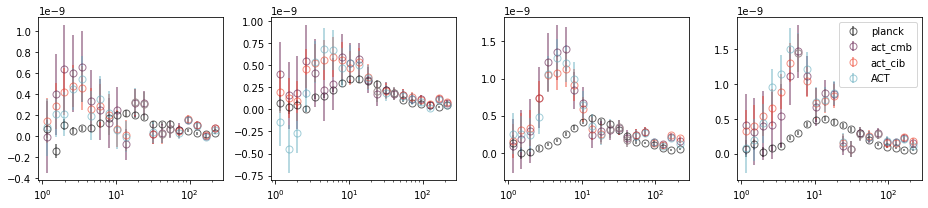

In [62]:
%matplotlib inline

colors = ['#601A4A', '#EE442F','#63ACBE']

import matplotlib.pyplot as plt
path_save = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_tsz/rerun_mastercat_4_20'
path_save = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_tsz/rerun_mastercat_4_20_newACT/'

fig, ax = plt.subplots(1,4, figsize=(13,3.))

for i in range(4):
    #theta = y3['Yshear_y3']['{0}'.format(i)]['theta']*60.
    #xi = y3['Yshear_y3']['{0}'.format(i)]['xip']
    #xi_err = y3['Yshear_y3']['{0}'.format(i)]['err_p']
    #ax[i].errorbar(theta,xi,xi_err, label='planck')
    print ('bin: ',i+1)
    y3_ACT = load_obj(path_save +'/_Yshear_{0}__tsz__tsz'.format(i))
    theta = y3_ACT['high']['theta']*60.
    xi = y3_ACT['high']['xip1']
    def covarianc
    xi_err = dd['err']
    ax[i].errorbar(theta,xi,xi_err,label='planck',fmt='o', alpha = 0.6 ,markersize=7,markerfacecoloralt='black',color='black',fillstyle='none')
    ax[i].set_xscale('log', nonposx='clip')
    #ax[1,i].plot(theta,xi_err,label='planck')
    #ax[1,i].set_xscale('log', nonposx='clip')
    
    sn = np.matmul((xi),np.matmul(np.linalg.inv(dd['cov']),xi))
    print ('Planck  S/N: {0:2.2f}'.format(np.sqrt(sn)))
    y3_ACT = load_obj(path_save +'/_YACT_cmb_shear_{0}__tsz_ACT_cmb__tsz'.format(i))
    theta = y3_ACT['high']['theta']*60.
    xi = y3_ACT['high']['xip1']
    dd = covariance_jck(y3_ACT['high']['corr_jckp'].T,200,'jackknife')
    xi_err = dd['err']
    ax[i].errorbar(theta,xi,xi_err,label='act_cmb',fmt='o', alpha = 0.6 ,markersize=7,markerfacecoloralt=colors[0],color=colors[0],fillstyle='none')
    ax[i].set_xscale('log', nonposx='clip')
    
    y3_ACT = load_obj(path_save +'/_YACT_cib_shear_{0}__tsz_ACT_cib__tsz'.format(i))
    theta = y3_ACT['high']['theta']*60.
    xi = y3_ACT['high']['xip1']
    dd = covariance_jck(y3_ACT['high']['corr_jckp'].T,200,'jackknife')
    xi_err = dd['err']
    ax[i].errorbar(theta,xi,xi_err,label='act_cib',fmt='o', alpha = 0.6 ,markersize=7,markerfacecoloralt=colors[1],color=colors[1],fillstyle='none')
    ax[i].set_xscale('log', nonposx='clip')
    ##
    ##
    y3_ACT = load_obj(path_save +'/_YACT_shear_{0}__tsz_ACT__tsz'.format(i))
    theta = y3_ACT['high']['theta']*60.
    xi = y3_ACT['high']['xip1']
    dd = covariance_jck(y3_ACT['high']['corr_jckp'].T,200,'jackknife')
    xi_err = dd['err']
    ax[i].errorbar(theta,xi,xi_err,label='ACT',fmt='o', alpha = 0.6 ,markersize=7,markerfacecoloralt=colors[2],color=colors[2],fillstyle='none')
    ax[i].set_xscale('log', nonposx='clip')

    #ax[1,i].plot(theta,xi_err,label='act')
    #ax[1,i].set_xscale('log', nonposx='clip')
    
    sn = np.matmul(xi,np.matmul(np.linalg.inv(dd['cov']),xi))
    print ('ACT  S/N: {0:2.2f}'.format(np.sqrt(sn)))
    print ('')
    
plt.legend()
#plt.xscale('log', nonposx='clip')

'''
('bin: ', 1)
ACT  S/N: 8.19 [small scales]
ACT  S/N: 7.68

('bin: ', 2)
ACT  S/N: 7.27 [small scales]
ACT  S/N: 6.93

('bin: ', 3)
ACT  S/N: 9.98 [small scales]
ACT  S/N: 9.82

('bin: ', 4)
ACT  S/N: 10.27 [small scales]
ACT  S/N: 10.56






('bin: ', 2)
Planck  S/N: 14.81


('bin: ', 3)
Planck  S/N: 16.46


('bin: ', 4)
Planck  S/N: 20.34


'''

('bin: ', 1)
Planck  S/N: 11.99
('bin: ', 1)
Planck  S/N: 5.15
('bin: ', 2)
Planck  S/N: 15.38
('bin: ', 2)
Planck  S/N: 5.41
('bin: ', 3)
Planck  S/N: 17.15
('bin: ', 3)
Planck  S/N: 5.29
('bin: ', 4)
Planck  S/N: 19.53
('bin: ', 4)
Planck  S/N: 5.80


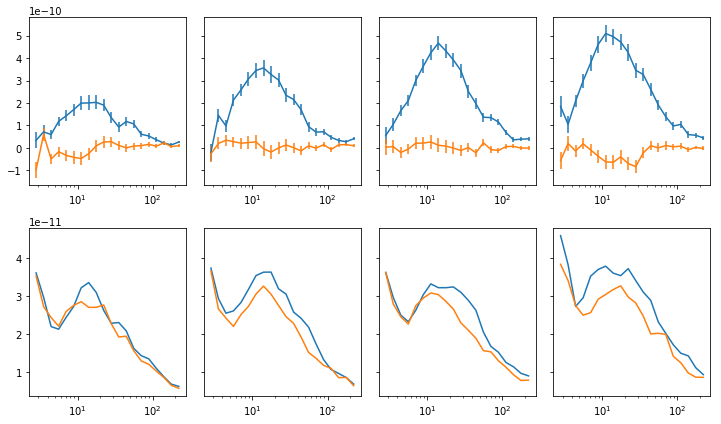

In [123]:
path_save = '/global/cscratch1/sd/mgatti/Cosmic_shear/output_tsz/rerun_mastercat_4_20'
fig, ax = plt.subplots(2,4, figsize=(10,6),sharey='row')
for i in range(4):
    #theta = y3['Yshear_y3']['{0}'.format(i)]['theta']*60.
    #xi = y3['Yshear_y3']['{0}'.format(i)]['xip']
    #xi_err = y3['Yshear_y3']['{0}'.format(i)]['err_p']
    #ax[i].errorbar(theta,xi,xi_err, label='planck')
    print ('bin: ',i+1)
    y3_ACT = load_obj(path_save +'/_Yshear_{0}__tsz__tsz'.format(i))
    theta = y3_ACT['high']['theta']*60.
    xi = y3_ACT['high']['xip1']
    dd = covariance_jck(y3_ACT['high']['corr_jckp'].T,200,'jackknife')
    xi_err = dd['err']
    ax[0,i].errorbar(theta,xi,xi_err,label='planck')
    ax[0,i].set_xscale('log', nonposx='clip')
    ax[1,i].plot(theta,xi_err,label='planck')
    ax[1,i].set_xscale('log', nonposx='clip')
    
    sn = np.matmul(xi,np.matmul(np.linalg.inv(dd['cov']),xi))
    print ('Planck  S/N: {0:2.2f}'.format(np.sqrt(sn)))
 


    print ('bin: ',i+1)
    y3_ACT = load_obj(path_save +'/_Yshear_{0}__tsz__tsz'.format(i))
    theta = y3_ACT['high']['theta']*60.
    xi = y3_ACT['high']['xim1']
    dd = covariance_jck(y3_ACT['high']['corr_jckm'].T,200,'jackknife')
    xi_err = dd['err']
    ax[0,i].errorbar(theta,xi,xi_err,label='planck')
    ax[0,i].set_xscale('log', nonposx='clip')
    ax[1,i].plot(theta,xi_err,label='planck')
    ax[1,i].set_xscale('log', nonposx='clip')
    
    sn = np.matmul(xi,np.matmul(np.linalg.inv(dd['cov']),xi))
    print ('Planck  S/N: {0:2.2f}'.format(np.sqrt(sn)))

In [2]:
import pyfits as pf
path_qq = "/global/homes/m/mjarvis/desdata/users/mjarvis/y3a1-v29/psf_y3a1-v29.fits"
mute = pf.open(path_qq)
band = mute[1].data['band'] 
mag = mute[1].data['mag'] 


In [3]:
min(band)

'Y'

In [ ]:
[runtime]
;sampler = emcee
;sampler = grid
;sampler = test
sampler = test
;sampler = polychord
root = ${COSMOSIS_SRC_DIR}

[DEFAULT]
;2PT_FILE = ${COSMOSIS_SRC_DIR}/ACTxDESY3/src/data/v0.40_fiducial.fits
2PT_FILE =/global/homes/m/mgatti/Mass_Mapping/tsz/DES_Planck_theorycov_theorydv.fits
;2PT_FILE =/global/homes/m/mgatti/Mass_Mapping/tsz/DES_ACT_theorycov_theorydv.fits
twopt_file = /global/cfs/cdirs/des/shivamp/ACTxDESY3_data/actxdes_shear/planck_desy3_kk_gty_reformat_autobinonly_cov_theory_25_6_20.pk

stat_analyze = kk_gty
;stat_analyze = gty


2PT_DATA_SETS = compton_shear xip xim
AUTO_ONLY = gty kk kkm

;xip xim compton_shear 
params_files_dir = ${COSMOSIS_SRC_DIR}/ACTxDESY3/src/params_files/
params_file = params_des_kk_ky_plancky3_beamed_testcov.ini
;params_file = params_des_kk_ky_act_beamed.ini

params_def_file = params_default.ini
bins_source = [1,2,3,4]
#;, 2, 3, 4]
bins_to_fit = [1,2,3,4]
#, 2, 3, 4]
bins_lens = [1,2,3,4]
z_edges=[0.15,0.3,0.45,0.6,0.75,0.9]
;xcoord_comp_min = [5,5,5,5,5,5,5,5]
;xcoord_comp_max = [210,210,210,210,210,210,210,210]
xcoord_comp_min = [0,0,0,0,0,0,0,0]
xcoord_comp_max = [250,250,250,250,250,250,250,250]
sec_save_name = theory_yx_save
save_real_space_cov = False
verbose = False



[output]
filename= ${COSMOSIS_SRC_DIR}/ACTxDESY3/src/chains/chain_marco_planck_2_cut.txt
format=text
lock=F

[multinest]
max_iterations=500000
multinest_outfile_root=mn/marco_planck_2_cut
resume=T
live_points=64
efficiency=0.7
tolerance=0.1

[grid]
nsample_dimension=100

[pipeline]
quiet=T
timing=F
debug=F

#modules = consistency camb sigma8_rs extrapolate_linear mead fits_nz theory_yx extrapolate fits_nz pk_to_cl_HMCODE pk_to_cl_gg shear_2pt_eplus 2pt_gal 2pt_gal_shear save_2pt_fourier save_2pt
#
modules = consistency camb sigma8_rs extrapolate_linear mead fits_nz theory_yx conversion 2pt_like
#like_sz
#like_sz_marco 

;modules = fits_nz theory_yx
values = ${COSMOSIS_SRC_DIR}/ACTxDESY3/src/values/values_planckxy3_shear_mead.ini
likelihoods = 2pt

[conversion]
file = ${COSMOSIS_SRC_DIR}/ACTxDESY3/src/cosmosis_code/convert.py

[2pt_like]
file = cosmosis-standard-library/likelihood/2pt/2pt_like.py
;settings for pm-marginalization
;;;;;;;
;;;;;;;
data_file = %(2PT_FILE)s
data_sets = %(2PT_DATA_SETS)s
make_covariance=F
covmat_name=COVMAT
;%include ${SCALE_CUT_DIR}/${SCALE_CUTS}

angle_range_compton_shear_1_1 = 10.12376759118 250.0
angle_range_compton_shear_2_2 = 10.12376759118 250.0
angle_range_compton_shear_3_3 = 10.12376759118 250.0
angle_range_compton_shear_4_4 = 10.12376759118 250.0





[fits_nz]
file = cosmosis-standard-library/number_density/load_nz_fits/load_nz_fits.py
nz_file = %(2PT_FILE)s
data_sets = source lens
; data_sets = shear_true  pos_zspec
prefix_section = T
prefix_extension = T

[load_nz]
file = ${COSMOSIS_SRC_DIR}/cosmosis-standard-library/number_density/load_nz_fits/load_nz_fits.py
nz_file = ${COSMOSIS_SRC_DIR}/ACTxDESY3/src/data/Nz-a4_b18_mag_lim_v2p2_zbinv2.fits
data_sets = lens
prefix_section = T
prefix_extension = T

[theory_yx]
file = ${COSMOSIS_SRC_DIR}/ACTxDESY3/src/cosmosis_code/get_theory_interface.py
sec_name = theory_yx
#run_cov_pipe = True
run_cov_pipe = False
save_data_fname = ${COSMOSIS_SRC_DIR}/ACTxDESY3/src/results/DV_obj_temp_%(stat_analyze)s_plancky3_beamed_bf_kk_gty.pk
;save_data_fname = ${COSMOSIS_SRC_DIR}/ACTxDESY3/src/results/DV_obj_temp_%(stat_analyze)s_ACT_beamed_bf_kk_gty.pk

theta_min = 2.5
theta_max = 250.
#ntheta = 20
dlogtheta = uselarray
use_Plin_block = True
#use_dndm_block = True
#use_dndm_block = False


[

# Fortuna et al model for IA

/global/homes/m/mgatti/.conda/envs/py3s/lib/python3.6/site-packages/mcfit-0.0.16-py3.6.egg/mcfit/mcfit.py:125: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
/global/homes/m/mgatti/.conda/envs/py3s/lib/python3.6/site-packages/mcfit-0.0.16-py3.6.egg/mcfit/mcfit.py:215: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results


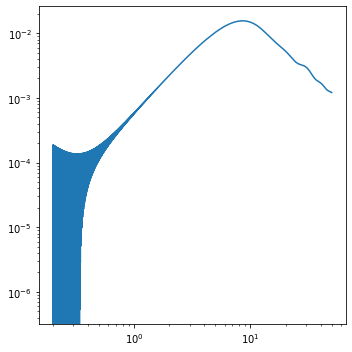

In [61]:
from mcfit import xi2P
import sys, os
sys.path.insert(0,  '/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis//ACTxDESY3/src/cosmosis_code')
os.environ['COSMOSIS_SRC_DIR'] = '/global/cscratch1/sd/mgatti/Mass_Mapping/TSZ_ACT/cosmosis/'
import scipy
import numpy as np
import copy
import pdb
import ast
import scipy as sp
from scipy import interpolate

from HOD import *
from pressure import *
from general_hm import *
from Powerspec import *
from PrepDataVec import *
from DataVec import *
import pickle





import numpy as np
import cmath
def g_n(n,phi):
    x = np.linspace(0,2*np.pi,1000)
    f = np.cos(2*x)*(np.cos(phi-x))**n
    return np.trapz(f,x)/np.cos(2*phi)
def I(a,b):
    x = np.linspace(-1,1,10000)
    f = (1-x**2)**(0.5*a)*x**b
    return np.trapz(f,x)


def fl(l,theta,phi):
    wm = 0
    for m in range(l+1):
        wg = 0.
        for j in range(m+1):
            wg+= scipy.special.binom(m,j)*g_n(j,phi)*I(j+1,m-j)*np.sin(theta)**j*np.cos(theta)**(m-j)
        #print(wg,l,m)
        wm += scipy.special.binom(l, m)*scipy.special.binom(0.5*(l+m-1.),l)*wg
    return 2**l* cmath.exp(1j*2*phi)*wm


def gamma_r(A_IA,r,r_vir):
    gr = A_IA*(r/r_vir)**(-2)
    gr[r<0.06] = A_IA*(0.06/r_vir)**(-2)
    
    gr[gr>0.3] = 0.3
    return gr

    
def takefft(A_IA,M,c,rho_crit, Dv=200):
    r_array = np.logspace(-3,1,2000)
    rv = (M/(4*np.pi/3.))**(1./3.)
    rs = rv/c
    rho_s = (M/(4.*np.pi*rs**3))*(np.log(1. + c) - c/(1.+c))
    u_rm = rho_s*((r_array/rs)**-1)*((1. + (r_array/rs))**-3)
    

    ind_gtrv = np.where(r_array > rv)[0]
    u_rm[ind_gtrv] = 0.
    ell_array = np.arange(6)
    ulkm_all = []
    
    for ell in ell_array:
        k, ulkm = xi2P(r_array, l=ell)(u_rm*gamma_r(A_IA,r_array,rv))
        ulkm_all.append(ulkm)
    return ulkm_all,k

def compute_gamma_k_m(A_IA,M,c,rho_crit):
                      
    ulkm_all,k = takefft(A_IA,M,c,rho_crit, Dv=200)
    
    gammakm = 0j*ulkm_all[0]
    for l in range(6):
        gammakm+=(fl(l,np.pi/2.,0.))*ulkm_all[l]*(1j**l)*(2.*l+1.)
    
    return gammakm.real,k
#
    
A_IA = 0.1
M=1
c=1
rho_crit=1
output,k = compute_gamma_k_m(A_IA,M,c,rho_crit)
    

fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.plot(k[(k>0.2)&(k<50)],output[(k>0.2)&(k<50)])
ax.set_yscale('log')
ax.set_xscale('log', nonposx='clip')